<a href="https://colab.research.google.com/github/barish-bit/Heart_Sound_Classification_Knowledge_Distillation/blob/main/Heart_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PACKAGES AND LIBRARIES

In [ ]:
pip install pydub

In [ ]:
pip install tensorflow

In [ ]:

pip install keras

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from tensorflow.keras import regularizers
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

PATH, LABEL, TRANSFORMATION

MAIN CSV

In [ ]:
Set_A_Data = pd.read_csv("/content/drive/MyDrive/Heart Sound/set_a.csv")
Set_B_Data = pd.read_csv("/content/drive/MyDrive/Heart Sound/set_b.csv")

In [ ]:
print(Set_A_Data.head(-1))

    dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]


In [ ]:
print(Set_A_Data.isnull().sum())

dataset       0
fname         0
label        52
sublabel    176
dtype: int64


In [ ]:
print(Set_A_Data["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [ ]:
print(Set_A_Data["dataset"].value_counts())

a    176
Name: dataset, dtype: int64


In [ ]:
print(Set_B_Data.head(-1))

    dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2     

In [ ]:
print(Set_B_Data.isnull().sum())

dataset       0
fname         0
label       195
sublabel    507
dtype: int64


In [ ]:
print(Set_B_Data["label"].value_counts())

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [ ]:
print(Set_B_Data["dataset"].value_counts())

b    656
Name: dataset, dtype: int64


TO CONCAT

In [ ]:
DataFrames = [Set_A_Data,Set_B_Data]
Concat_Data = pd.concat(DataFrames)
print(Concat_Data.head(-1))

    dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3          

In [ ]:
print(Concat_Data.isnull().sum())

dataset       0
fname         0
label       247
sublabel    683
dtype: int64


In [ ]:

Concat_Data.drop(["sublabel","dataset"],axis="columns",inplace=True)
print(Concat_Data.head(-1))

                                                 fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[831 rows x 2 columns]


In [ ]:
print(Concat_Data["label"].value_counts())

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64


In [ ]:
Concat_Data = Concat_Data.dropna()
print(Concat_Data.head(600))

                                                 fname     label
0                     set_a/artifact__201012172012.wav  artifact
1                     set_a/artifact__201105040918.wav  artifact
2                     set_a/artifact__201105041959.wav  artifact
3                     set_a/artifact__201105051017.wav  artifact
4                     set_a/artifact__201105060108.wav  artifact
..                                                 ...       ...
651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
655  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[585 rows x 2 columns]


In [ ]:
Concat_Data = Concat_Data.reset_index()
print(Concat_Data.head(-1))

     index                                              fname     label
0        0                   set_a/artifact__201012172012.wav  artifact
1        1                   set_a/artifact__201105040918.wav  artifact
2        2                   set_a/artifact__201105041959.wav  artifact
3        3                   set_a/artifact__201105051017.wav  artifact
4        4                   set_a/artifact__201105060108.wav  artifact
..     ...                                                ...       ...
579    650  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
580    651  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
581    652  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
582    653  set_b/Btraining_normal_Btraining_noisynormal_2...    normal
583    654  set_b/Btraining_normal_Btraining_noisynormal_2...    normal

[584 rows x 3 columns]


In [ ]:
print(Concat_Data.isnull().sum())

index    0
fname    0
label    0
dtype: int64


In [ ]:
Concat_Data.drop("index",axis="columns",inplace=True)

TO CREATE NEW DATAFRAME

In [ ]:
Path_Wav_List = []
Category_List = []

for path_number in range(585):
   # File_Path_Name = "../input/heartbeat-sounds/" + str(Concat_Data["fname"][path_number])
    File_Path_Name = "/content/drive/MyDrive/Heart Sound/" + str(Concat_Data["fname"][path_number])
    File_Path_Name = File_Path_Name.replace("Btraining_","")
    File_Path_Name = File_Path_Name.replace("normal_","normal__")
    File_Path_Name = File_Path_Name.replace("murmur_","murmur__")
    File_Path_Name = File_Path_Name.replace("normal__noisynormal__","normal_noisynormal_")
    File_Path_Name = File_Path_Name.replace("murmur_","murmur__")
    File_Path_Name = File_Path_Name.replace("extrastole_","extrastole__")
    File_Path_Name = File_Path_Name.replace("Bunlabelledtest_","Bunlabelledtest__")
    Path_Wav_List.append(File_Path_Name)
    Category_List.append(Concat_Data["label"][path_number])

In [ ]:
print(Path_Wav_List[0:4])
print(Path_Wav_List[-1])

['/content/drive/MyDrive/Heart Sound/set_a/artifact__201012172012.wav', '/content/drive/MyDrive/Heart Sound/set_a/artifact__201105040918.wav', '/content/drive/MyDrive/Heart Sound/set_a/artifact__201105041959.wav', '/content/drive/MyDrive/Heart Sound/set_a/artifact__201105051017.wav']
/content/drive/MyDrive/Heart Sound/set_b/normal_noisynormal_296_1311682952647_D.wav


In [ ]:
print(Category_List[0:4])

['artifact', 'artifact', 'artifact', 'artifact']


In [ ]:
Path_Wav_Series = pd.Series(Path_Wav_List,name="WAV").astype(str)
Category_Series = pd.Series(Category_List,name="CATEGORY")
Main_Heartbeat_Data1 = pd.concat([Path_Wav_Series,Category_Series],axis=1)
print(Main_Heartbeat_Data1.head(-1))

                                                   WAV  CATEGORY
0    /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
1    /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
2    /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
3    /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
4    /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
..                                                 ...       ...
579  /content/drive/MyDrive/Heart Sound/set_b/norma...    normal
580  /content/drive/MyDrive/Heart Sound/set_b/norma...    normal
581  /content/drive/MyDrive/Heart Sound/set_b/norma...    normal
582  /content/drive/MyDrive/Heart Sound/set_b/norma...    normal
583  /content/drive/MyDrive/Heart Sound/set_b/norma...    normal

[584 rows x 2 columns]


In [ ]:
Main_Heartbeat_Data1.to_csv("Main_Heartbeat1_Doc.csv")

In [ ]:
MH=pd.read_csv("/content/Main_Heartbeat1_Doc.csv")
A_1=pd.read_csv("/content/drive/MyDrive/Heart sound 2/A_artifact.csv")
A_2=pd.read_csv("/content/drive/MyDrive/Heart sound 2/A_extrahls.csv")
A_3=pd.read_csv("/content/drive/MyDrive/Heart sound 2/A_murmur.csv")
A_4=pd.read_csv("/content/drive/MyDrive/Heart sound 2/A_normal.csv")
B_1=pd.read_csv("/content/drive/MyDrive/Heart sound 2/B_extrastole.csv")
B_2=pd.read_csv("/content/drive/MyDrive/Heart sound 2/B_murmur.csv")
B_3=pd.read_csv("/content/drive/MyDrive/Heart sound 2/B_normal.csv")

In [ ]:
DataFrames1 = [MH,A_1,A_2,A_3,A_4,B_1,B_2,B_3]
Main_Heartbeat_Data = pd.concat(DataFrames1)
print(Main_Heartbeat_Data.head(-1))

     Unnamed: 0                                                WAV  CATEGORY
0           0.0  /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
1           1.0  /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
2           2.0  /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
3           3.0  /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
4           4.0  /content/drive/MyDrive/Heart Sound/set_a/artif...  artifact
..          ...                                                ...       ...
194         NaN  /content/drive/MyDrive/Heart sound 2/Training ...    normal
195         NaN  /content/drive/MyDrive/Heart sound 2/Training ...    normal
196         NaN  /content/drive/MyDrive/Heart sound 2/Training ...    normal
197         NaN  /content/drive/MyDrive/Heart sound 2/Training ...    normal
198         NaN  /content/drive/MyDrive/Heart sound 2/Training ...    normal

[1020 rows x 3 columns]


In [ ]:

Main_Heartbeat_Data.reset_index()

,index,Unnamed: 0,WAV,CATEGORY
0,0,0.0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
1,1,1.0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
2,2,2.0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
3,3,3.0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
4,4,4.0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
...,...,...,...,...
1016,195,NaN,/content/drive/MyDrive/Heart sound 2/Training ...,normal
1017,196,NaN,/content/drive/MyDrive/Heart sound 2/Training ...,normal
1018,197,NaN,/content/drive/MyDrive/Heart sound 2/Training ...,normal
1019,198,NaN,/content/drive/MyDrive/Heart sound 2/Training ...,normal


In [ ]:
Main_Heartbeat_Data.drop(["Unnamed: 0"],axis="columns",inplace=True)

In [ ]:
Main_Heartbeat_Data.head(-1)

,WAV,CATEGORY
0,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
1,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
2,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
3,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
4,/content/drive/MyDrive/Heart Sound/set_a/artif...,artifact
...,...,...
194,/content/drive/MyDrive/Heart sound 2/Training ...,normal
195,/content/drive/MyDrive/Heart sound 2/Training ...,normal
196,/content/drive/MyDrive/Heart sound 2/Training ...,normal
197,/content/drive/MyDrive/Heart sound 2/Training ...,normal


TO SHUFFEL

In [ ]:
Main_Heartbeat_Data = Main_Heartbeat_Data.sample(frac=1).reset_index(drop=True)
print(Main_Heartbeat_Data["CATEGORY"].value_counts())

normal        582
murmur        229
extrastole     92
artifact       80
extrahls       38
Name: CATEGORY, dtype: int64


In [ ]:
print(Main_Heartbeat_Data.head(-1))

                                                    WAV    CATEGORY
0     /content/drive/MyDrive/Heart sound 2/Btraining...      murmur
1     /content/drive/MyDrive/Heart Sound/set_b/norma...      normal
2     /content/drive/MyDrive/Heart Sound/set_b/murmu...      murmur
3     /content/drive/MyDrive/Heart sound 2/Training ...      normal
4     /content/drive/MyDrive/Heart Sound/set_a/extra...    extrahls
...                                                 ...         ...
1015  /content/drive/MyDrive/Heart Sound/set_b/norma...      normal
1016  /content/drive/MyDrive/Heart sound 2/Atraining...      normal
1017  /content/drive/MyDrive/Heart Sound/set_a/extra...    extrahls
1018  /content/drive/MyDrive/Heart Sound/set_b/extra...  extrastole
1019  /content/drive/MyDrive/Heart Sound/set_b/norma...      normal

[1020 rows x 2 columns]


In [ ]:
Concat_Data.to_csv("New_Heartbeat_Doc.csv")
Main_Heartbeat_Data.to_csv("Main_Heartbeat_Doc.csv")

PROCESS FUNCTION

NOISE

In [ ]:
def noise_function(data):
    noise_value = 0.0095 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])

    return data

STRETCH FUNCTION

SHIFT FUNCTION

In [ ]:
def shift_function(data):

    shift_range = int(np.random.uniform(-3,3) * 1000)
    return np.roll(data,shift_range)

PITCH FUNCTION

In [ ]:

def pitch_function(data,sampling_rate,pitch_factor=0.3):

    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

SPEACHSHOW FUNCTION

In [ ]:
def specshow_function(wav_path):

    figure,axis = plt.subplots(4,1,figsize=(14,6))

    audio_type,sample_rate = librosa.load(wav_path)
    stft_audio = librosa.stft(audio_type)
    Db_audio = librosa.amplitude_to_db(abs(stft_audio))
    Img_Log = librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="log",cmap='gray_r',ax=axis[0])
    axis[0].set(title='LOG')
    Img_Mel = librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="mel",cmap='gray_r',ax=axis[1])
    axis[1].set(title='MEL')
    Img_Chroma = librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="chroma",cmap='gray_r',ax=axis[2])
    axis[2].set(title='CHROMA')
    Img_Hz = librosa.display.specshow(Db_audio,sr=sample_rate,x_axis="time",y_axis="hz",cmap='gray_r',ax=axis[3])
    axis[3].set(title='HZ')


    for ax_i in axis:
        ax_i.label_outer()


    figure.colorbar(Img_Log, ax=[axis[0], axis[1]])

    # Or have individual colorbars:
    figure.colorbar(Img_Chroma, ax=[axis[2],axis[3]])

    axis[0].set(xlim=[1, 3])

WAVEPLOT FUNCTION

PLAYING FUNCTION

In [ ]:
def playing_function(wav_path):

    audio_type,sample_rate = librosa.load(wav_path)
    return Audio(audio_type,rate=sample_rate)

EXTRACT FUNCTION

In [ ]:
def extract_function(data):

    output_result = np.array([])

    mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero_crossing_rate))

    stft_output = np.abs(librosa.stft(data))
    chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_mean))

    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))

    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))

    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_output))

    return output_result


EXPORT FUNCTION

ANALYSIS

In [ ]:
plt.style.use("dark_background")

PLAYING

In [ ]:
try:
    playing_function(Main_Heartbeat_Data["WAV"][380])
except Exception as error:
    print("NO DIRECTORY ERROR")

In [ ]:
playing_function(Main_Heartbeat_Data["WAV"][380])

WAVEPLOT

In [ ]:
def waveplot_function(wav_path):
    figure = plt.figure(figsize=(14,6))

    audio_type,sample_rate = librosa.load(wav_path)
    librosa.display.waveshow(audio_type,sr=sample_rate)

In [ ]:
'''import matplotlib.pyplot as plt
y, sr = librosa.load(Main_Heartbeat_Data["WAV"][380], duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()'''

'import matplotlib.pyplot as plt\ny, sr = librosa.load(Main_Heartbeat_Data["WAV"][380], duration=10)\nfig, ax = plt.subplots(nrows=3, sharex=True)\nlibrosa.display.waveshow(y, sr=sr, ax=ax[0])\nax[0].set(title=\'Envelope view, mono\')\nax[0].label_outer()'

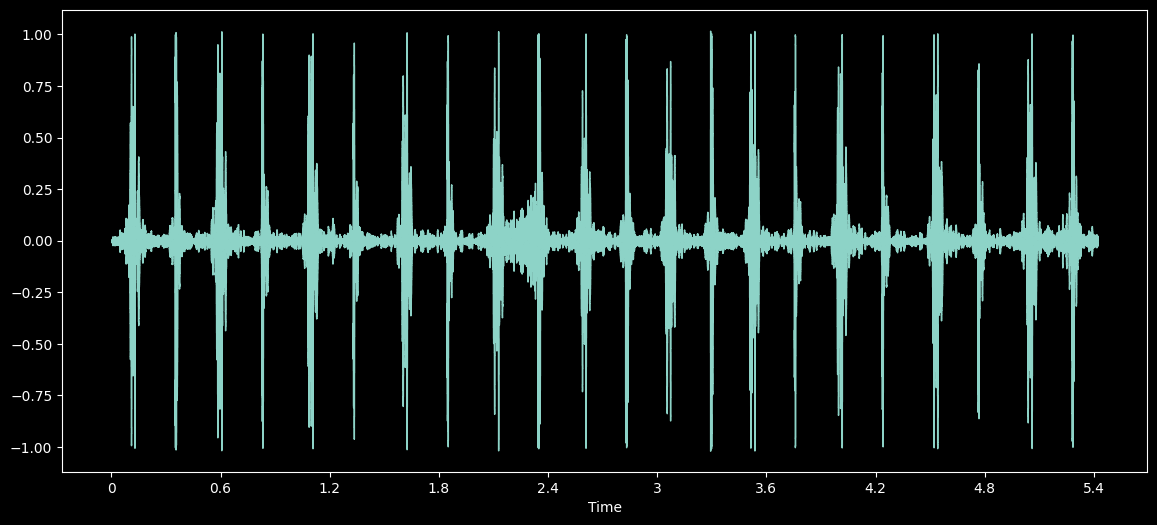

In [ ]:
waveplot_function(Main_Heartbeat_Data["WAV"][380])

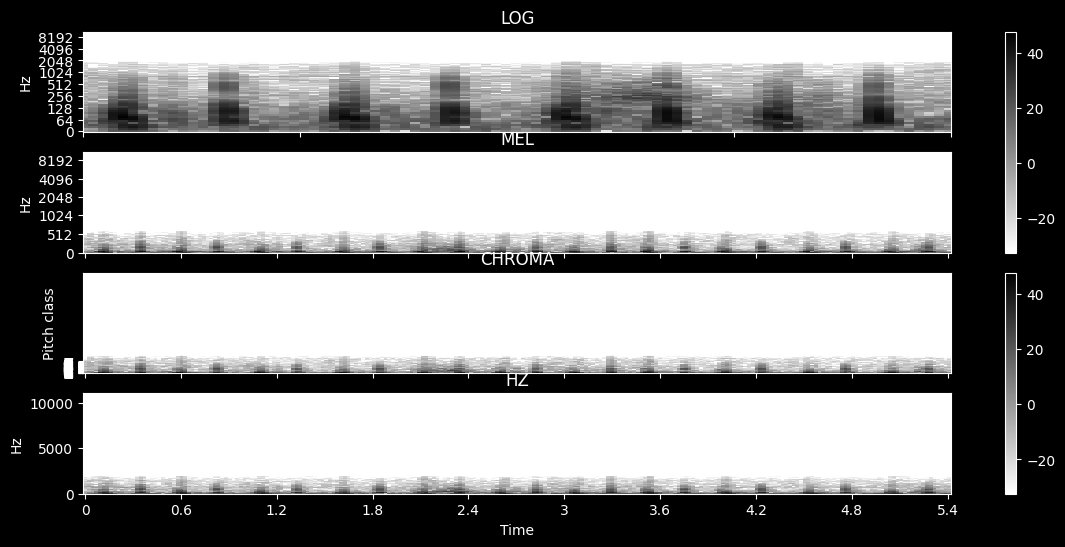

In [ ]:
specshow_function(Main_Heartbeat_Data["WAV"][380])

In [ ]:
wav_type,sample_rate = librosa.load(Main_Heartbeat_Data["WAV"][380])
noise_audio = noise_function(wav_type)
Audio(noise_audio,rate=sample_rate)

STRETCH

In [ ]:
def stretch_function(data):
  rate=2.0

  return librosa.effects.time_stretch(data,rate)

In [ ]:
y,sample_rate = librosa.load(Main_Heartbeat_Data["WAV"][380])
stretch_audio = librosa.effects.time_stretch(y, rate=0.6)
Audio(stretch_audio,rate=sample_rate)


In [ ]:
wav_type,sample_rate = librosa.load(Main_Heartbeat_Data["WAV"][380])
shift_audio = shift_function(wav_type)
Audio(shift_audio,rate=sample_rate)

In [ ]:
y,sr = librosa.load(Main_Heartbeat_Data["WAV"][380])
pitch_audio = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
Audio(pitch_audio,rate=sample_rate)

In [ ]:
wav_type,sample_rate = librosa.load(Main_Heartbeat_Data["WAV"][380])

print(wav_type.shape)
print(wav_type.dtype)
print(sample_rate)

(119561,)
float32
22050


In [ ]:
def export_function(path):

    data,sr = librosa.load(path,duration=3.0)

    Output_One = extract_function(data)
    result = np.array(Output_One)

    noise_output = noise_function(data)
    Output_Two = extract_function(noise_output)
    result = np.vstack((result,Output_Two))

    stretch_output = librosa.effects.time_stretch(data, rate=0.6)
    stretch_pitch = librosa.effects.pitch_shift(stretch_output, sr=sr, n_steps=4)
    Output_Three = extract_function(stretch_pitch)
    result = np.vstack((result,Output_Three))

    return result

In [ ]:
#wav_features = export_function('/content/drive/MyDrive/Heart Sound/set_b/normal__232_1308748524018_C.wav')
#print(wav_features)

In [ ]:
sample_rate = 22050
x_Train = []
y_Train = []

for path,category_wav in zip(Main_Heartbeat_Data.WAV,Main_Heartbeat_Data.CATEGORY):

    try:
        wav_features = export_function(path)

        for indexing in wav_features:
            x_Train.append(indexing)
            y_Train.append(category_wav)

    except Exception as e:
        print("NO DIRECTORY ERROR: ", path)

NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___noisymurmur___164_1307106095995_C1.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_a/murmur____201108222258.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_a/normal___201106151236.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___165_1307109069581_C.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___noisymurmur___240_1309201366049_D.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_a/murmur____201108222252.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___noisymurmur___162_1307101835989_D.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___242_1309197394064_B.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___197_1308141235553_C.wav
NO DIRECTORY ERROR:  /content/drive/MyDrive/Heart Sound/set_b/murmur___276_1311162716489_C.wav
NO DIRECTORY ERROR:  /cont

In [ ]:
New_Heartbeat_Wav = pd.DataFrame(x_Train)
New_Heartbeat_Wav["CATEGORY"] = y_Train

New_Heartbeat_Wav.to_csv("New_Wav_Heartbeat_Data.csv",index=False)


In [ ]:
New_Heartbeat_Wav=pd.read_csv("/content/drive/MyDrive/Heart Sound/New_Wav_Heartbeat_Data (1).csv")

In [ ]:
New_Heartbeat_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,CATEGORY
0,0.024553,0.617503,0.659975,0.765922,0.897758,0.867435,0.746313,0.729495,0.899740,0.701669,...,1.016425e-08,9.921924e-09,9.718563e-09,9.534761e-09,9.374257e-09,9.245291e-09,9.139344e-09,9.066452e-09,9.016678e-09,normal
1,0.039491,0.666661,0.705107,0.800976,0.920136,0.885792,0.755756,0.737295,0.892180,0.720388,...,7.764565e-05,7.192548e-05,7.442349e-05,7.490695e-05,7.782172e-05,7.506355e-05,7.290842e-05,7.584195e-05,7.643686e-05,normal
2,0.030203,0.651748,0.626794,0.584537,0.553521,0.545139,0.596885,0.692987,0.804918,0.756640,...,5.016513e-09,4.684177e-09,4.393631e-09,4.010707e-09,3.949059e-09,3.593554e-09,3.355185e-09,2.482682e-09,5.844018e-10,normal
3,0.024790,0.747273,0.734078,0.772771,0.767518,0.773113,0.807059,0.859330,0.856698,0.873504,...,6.600418e-08,6.443475e-08,6.311763e-08,6.192665e-08,6.088639e-08,6.005092e-08,5.936456e-08,5.889235e-08,5.857014e-08,normal
4,0.026822,0.751259,0.753629,0.786201,0.780127,0.785815,0.818276,0.856882,0.854656,0.864461,...,7.729568e-06,7.723376e-06,7.801177e-06,7.899234e-06,7.987691e-06,7.513373e-06,7.780323e-06,7.822000e-06,7.936240e-06,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0.009766,0.744083,0.758281,0.793798,0.798254,0.827708,0.862951,0.852137,0.858576,0.880888,...,5.062349e-08,4.942036e-08,4.841103e-08,4.749822e-08,4.670067e-08,4.606035e-08,4.553419e-08,4.517192e-08,4.492525e-08,normal
2578,0.017165,0.783923,0.799948,0.832732,0.840397,0.863661,0.883008,0.849634,0.855472,0.878662,...,4.274956e-05,4.462757e-05,4.526795e-05,4.416933e-05,4.498716e-05,4.357749e-05,4.153117e-05,4.425734e-05,4.263822e-05,normal
2579,0.013446,0.749366,0.716867,0.683464,0.640523,0.707031,0.730204,0.730628,0.752301,0.787597,...,3.500510e-08,3.185849e-08,3.061044e-08,2.763664e-08,2.707976e-08,2.512394e-08,2.336035e-08,1.591479e-08,4.216038e-09,normal
2580,0.008301,0.784294,0.798676,0.829593,0.819407,0.793855,0.822318,0.811478,0.860679,0.868298,...,3.421471e-06,3.339993e-06,3.271622e-06,3.209820e-06,3.155826e-06,3.112460e-06,3.076844e-06,3.052324e-06,3.035613e-06,normal


In [ ]:
print(New_Heartbeat_Wav["CATEGORY"][0])
#print(Main_Heartbeat_Data["CATEGORY"][0])
#Main_Heartbeat_Data.head(-1)

normal


In [ ]:
print(New_Heartbeat_Wav["CATEGORY"].value_counts())

normal        1653
murmur         300
extrastole     276
artifact       240
extrahls       114
Name: CATEGORY, dtype: int64


In [ ]:
Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

In [ ]:
Values_X = New_Heartbeat_Wav.iloc[:,:-1].values
Labels_X = New_Heartbeat_Wav["CATEGORY"].values

In [ ]:
print(Values_X.shape)
print(Labels_X.shape)

(2583, 162)
(2583,)


In [ ]:
Labels_X_Encode = Encoder_Function.fit_transform(np.array(Labels_X).reshape(-1,1)).toarray()
print(Labels_X_Encode[0:5])

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
print(Labels_X_Encode.shape)

(2583, 5)


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(Values_X,Labels_X_Encode,train_size=0.9,random_state=42,shuffle=True)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(2324, 162)
(2324, 5)
(259, 162)
(259, 5)


In [ ]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)
print(xTrain.shape)
print(xTest.shape)

(2324, 162, 1)
(259, 162, 1)


In [ ]:
#print(xTest[0])
#print(len(xTest[0]))
#print(xTrain[0])

In [ ]:
output_dim = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (xTrain.shape[1],1)

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=input_shape_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [ ]:
print(Model.summary())

In [ ]:
print(Model.layers)

In [ ]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
'''Conv1D_Model = Model.fit(xTrain, yTrain,
                         batch_size=12,
                         epochs=70,
                                validation_data=(xTest, yTest), callbacks=[Early_Stopper,Checkpoint_Model])'''

In [ ]:
'''Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])'''

MODEL STRUCTURE WITH CONV2D

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 162)
(2324, 5)
(259, 162)
(259, 5)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 18, 9, 1)
X_test = X_test.reshape(X_test.shape[0], 18, 9, 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 18, 9, 1)
(2324, 5)
(259, 18, 9, 1)
(259, 5)


In [ ]:
Model_Check_Conv2D = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_Conv2D_model")

In [ ]:
Model_Conv2D = Sequential()
#
Model_Conv2D.add(Conv2D(64,(3, 3),padding="same",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))

Model_Conv2D.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Flatten())
Model_Conv2D.add(Dense(2048, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(1024, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(output_dim, activation = "softmax"))
Model_Conv2D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
'''Conv2D_Model = Model_Conv2D.fit(X_train, Y_train, batch_size=64, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_Conv2D])'''

In [ ]:
'''Model_Results_Conv2D = Model_Conv2D.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[0])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[1])'''

MODEL STRUCTURE WITH RNN - SEPCNN

In [ ]:
Model_Check_RNN_SEPCNN = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_RNN_SEPCNN_model")

In [ ]:
Model_R = Sequential()

Model_R.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
Model_R.add(BatchNormalization())
Model_R.add(MaxPooling2D((2,2)))

#
Model_R.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model_R.add(Dropout(0.2))
Model_R.add(MaxPooling2D((2,2)))


#
Model_R.add(TimeDistributed(Flatten()))
Model_R.add(Bidirectional(LSTM(64,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model_R.add(Bidirectional(LSTM(64,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))


Model_R.add(Flatten())
Model_R.add(Dense(128,activation="relu"))
Model_R.add(Dropout(0.5))
Model_R.add(Dense(output_dim,activation="softmax"))
Model_R.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
'''RNN_SEPCNN_Model = Model_R.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_RNN_SEPCNN])'''

In [ ]:
'''Model_Results_RNN_SEPCNN = Model_R.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_RNN_SEPCNN[0])
print("ACCURACY:  " + "%.4f" % Model_Results_RNN_SEPCNN[1])'''

MODEL STRUCTURE WITH LSTM

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

In [ ]:
Model_Check_LSTM = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

In [ ]:
Model_LSTM = Sequential()

Model_LSTM.add(Bidirectional(LSTM(units=64,
                                  dropout=0.2,
                                  return_sequences=True),
                             input_shape=(X_train.shape[1],X_train.shape[2])))

Model_LSTM.add(Bidirectional(LSTM(units=32,
                                  dropout=0.2,
                                  return_sequences=False)))

Model_LSTM.add(Dense(output_dim, activation='softmax'))
Model_LSTM.compile(optimizer="rmsprop",loss=compile_loss,metrics=compile_metrics)

In [ ]:
'''LSTM_Model = Model_LSTM.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_LSTM])'''

In [ ]:
'''Model_Results_LSTM = Model_LSTM.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[0])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[1])'''

MODEL STRUCTURE WITH CON1D AND GLOBALAVGPOOL1D

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)
print(X_train.shape)
print(X_test.shape)

In [ ]:
Model_Check_CONV1D_II = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_CONV1D_II_model")

In [ ]:
Model_CONV1D_II = Sequential()

Model_CONV1D_II.add(Conv1D(5,kernel_size=9,strides=1,padding="same",activation='relu',
                input_shape = (X_train.shape[1],1),
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
Model_CONV1D_II.add(BatchNormalization())
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))

Model_CONV1D_II.add(Conv1D(15,kernel_size=9,strides=1,padding="same", activation='relu',
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
Model_CONV1D_II.add(Dropout(0.25))
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))


Model_CONV1D_II.add(Conv1D(45,kernel_size=9,strides=1,padding="same", activation='relu',
                 kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
Model_CONV1D_II.add(Dropout(0.25))
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))


Model_CONV1D_II.add(Conv1D(65,kernel_size=9,strides=1,padding="same", activation='relu'))
Model_CONV1D_II.add(Dropout(0.25))
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))

Model_CONV1D_II.add(Conv1D(75,kernel_size=9,strides=1,padding="same", activation='relu'))
Model_CONV1D_II.add(Dropout(0.5))
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))
Model_CONV1D_II.add(Conv1D(85,kernel_size=9,strides=1,padding="same", activation='relu'))
Model_CONV1D_II.add(Dropout(0.5))
Model_CONV1D_II.add(MaxPooling1D(3,strides=2,padding="same"))

Model_CONV1D_II.add(Dropout(0.75))
Model_CONV1D_II.add(GlobalAvgPool1D())
Model_CONV1D_II.add(Dense(output_dim, activation='softmax'))
Model_CONV1D_II.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
'''CONV1D_II_Model = Model_CONV1D_II.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_CONV1D_II])'''

In [ ]:
'''Model_Results_CONV1D_II = Model_CONV1D_II.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_CONV1D_II[0])
print("ACCURACY:  " + "%.4f" % Model_Results_CONV1D_II[1])'''

SKLEARN

In [ ]:
Label_Encode = LabelEncoder()
Labels_X_Encode_II = Label_Encode.fit_transform(Labels_X)
xTrain,xTest,yTrain,yTest = train_test_split(Values_X,Labels_X_Encode_II,train_size=0.9,random_state=42,shuffle=True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

In [ ]:
xTrain = Scaler_Function.fit_transform(xTrain)
xTest = Scaler_Function.fit_transform(xTest)

In [ ]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

In [ ]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

Knowledge Distilation on Conv2D

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
tf.random.set_seed(3)


In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [ ]:
import csv
import os

In [ ]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
#input_shape_dim = (xTrain.shape[1],1)
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
teacher_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_Conv2D_model")

In [ ]:
print((X_train.shape[1], X_train.shape[2], X_train.shape[3]))

(18, 9, 1)


In [ ]:
# Create the teacher
teacher = keras.Sequential(
    [
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), padding="same", activation="relu"),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(2048, activation="relu"),
    Dropout(0.5),
    Dense(1024, activation="relu"),
    Dropout(0.5),
    Dense(output_dim, activation="softmax")
    ],
    name="teacher",
)

# Create the student
student = keras.Sequential(
    [
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(output_dim, activation="softmax")
    ],
    name="student",
)

# Clone student for later comparison
student_scratch = keras.Sequential(
    [
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(output_dim, activation="softmax")
    ],
    name="student_scratch",)

In [ ]:
# Train teacher as usual
teacher.compile(
   optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)





In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Assuming you have already compiled your deep learning model and have the dataset loaded into X_train, Y_train, X_test, Y_test

# Define cross-validation parameters
num_folds = 5

# Create the KFold object
kf = KFold(n_splits=num_folds, shuffle=True)

fold_scores = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}:")

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train the model
    history = teacher.fit(X_train_fold, Y_train_fold, epochs=10, batch_size=32, verbose=1)

    # Evaluate the model on the validation set
    score = teacher.evaluate(X_val_fold, Y_val_fold, verbose=0)
    fold_scores.append(score[1])  # Append validation accuracy to fold_scores list

    print(f"Fold {fold + 1} - Validation Accuracy: {score[1]}")

# Calculate the mean and standard deviation of the validation accuracies
mean_accuracy = np.mean(fold_scores)
std_accuracy = np.std(fold_scores)
print(f"\nMean Cross-Validation Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

# After cross-validation, you can evaluate your model on the test set
test_score = teacher.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest Accuracy: {test_score[1]}")







Fold 1:
Epoch 1/10
59/59 [==============================] - 6s 92ms/step - loss: 3.2279 - accuracy: 0.5880
Epoch 2/10
59/59 [==============================] - 7s 114ms/step - loss: 0.9927 - accuracy: 0.6789
Epoch 3/10
59/59 [==============================] - 5s 87ms/step - loss: 0.9343 - accuracy: 0.6950
Epoch 4/10
59/59 [==============================] - 7s 117ms/step - loss: 0.9045 - accuracy: 0.7058
Epoch 5/10
59/59 [==============================] - 5s 87ms/step - loss: 0.8728 - accuracy: 0.7041
Epoch 6/10
59/59 [==============================] - 5s 87ms/step - loss: 0.8769 - accuracy: 0.7197
Epoch 7/10
59/59 [==============================] - 7s 117ms/step - loss: 0.8369 - accuracy: 0.7197
Epoch 8/10
59/59 [==============================] - 5s 86ms/step - loss: 0.7569 - accuracy: 0.7413
Epoch 9/10
59/59 [==============================] - 6s 111ms/step - loss: 0.8081 - accuracy: 0.7283
Epoch 10/10
59/59 [==============================] - 5s 91ms/step - loss: 0.7665 - accuracy: 0.74

In [ ]:

# Train and evaluate teacher on data.
history=teacher.fit(X_train, Y_train, batch_size=64, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,teacher_Check])

# Retrieve the accuracy and loss values for each epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
loss_list=[]
accuracy_list=[]
# Print the accuracy and loss values for each epoch
for epoch in range(len(accuracy)):
    #print("Epoch", epoch+1)
    #print("  Accuracy:", accuracy[epoch])
    loss_list.append(loss[epoch])
    accuracy_list.append(accuracy[epoch])
    #print("  Validation Accuracy:", val_accuracy[epoch])
    #print("  Loss:", loss[epoch])
    #print("  Validation Loss:", val_loss[epoch])
#print(loss_list)
#print(accuracy_list)

# Output CSV file path
csv_file = 'LOSS_ACCURACY_KD_Conv2D_teacher.csv'

# Write the file names to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['LOSS', 'ACCURACY'])  # Write header
    for i in range(len(loss_list)):
        writer.writerow([loss_list[i], accuracy_list[i]])

print('File names have been written to', csv_file)



Epoch 1/70
37/37 [==============================] - 10s 228ms/step - loss: 3.2927 - accuracy: 0.6003 - val_loss: 1.0092 - val_accuracy: 0.6602
Epoch 2/70
37/37 [==============================] - 8s 212ms/step - loss: 0.9205 - accuracy: 0.6954 - val_loss: 0.8955 - val_accuracy: 0.6911
Epoch 3/70
37/37 [==============================] - 7s 193ms/step - loss: 0.8658 - accuracy: 0.7143 - val_loss: 0.8979 - val_accuracy: 0.6950
Epoch 4/70
37/37 [==============================] - 8s 226ms/step - loss: 0.8126 - accuracy: 0.7160 - val_loss: 0.8946 - val_accuracy: 0.7143
Epoch 5/70
37/37 [==============================] - 7s 185ms/step - loss: 0.8247 - accuracy: 0.7220 - val_loss: 0.8505 - val_accuracy: 0.7336
Epoch 6/70
37/37 [==============================] - 7s 177ms/step - loss: 0.7994 - accuracy: 0.7358 - val_loss: 0.8202 - val_accuracy: 0.6950
Epoch 7/70
37/37 [==============================] - 5s 146ms/step - loss: 0.8153 - accuracy: 0.7306 - val_loss: 1.0484 - val_accuracy: 0.7066
Epoch

In [ ]:
Model_Results_Conv2D = teacher.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[0])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[1])


9/9 [==============================] - 0s 15ms/step - loss: 1.4235 - accuracy: 0.7645
LOSS:  1.4235
ACCURACY:  0.7645


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 1s 34ms/step
Precision: 0.6086513885914185
Recall: 0.62492806762916
F-score: 0.5741458305411188


9/9 [==============================] - 0s 15ms/step


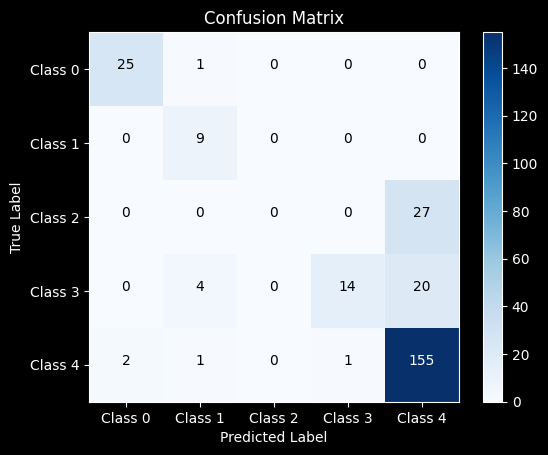

<Figure size 1920x1440 with 0 Axes>

[[4], [0], [4], [4], [4], [4], [0], [4], [4], [4], [3], [4], [0], [4], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [4], [0], [4], [4], [3], [4], [4], [4], [4], [0], [4], [4], [4], [4], [4], [4], [0], [4], [4], [4], [4], [4], [4], [1], [4], [4], [4], [0], [0], [4], [4], [4], [4], [4], [4], [1], [4], [4], [4], [4], [4], [4], [4], [4], [1], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [3], [4], [1], [4], [4], [0], [4], [4], [0], [0], [4], [0], [4], [4], [1], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [4], [4], [0], [4], [1], [4], [4], [4], [4], [4], [1], [4], [4], [4], [3], [1], [4], [4], [4], [4], [1], [4], [0], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [0], [3], [0], [3], [4], [4], [0], [4], [4], [3], [1], [4], [4], [4], [4], [3], [4], [4], [4], [1], [4], [4], [4], [4], [4], [4], [4], [3], [4], [1], [4], [4], [4], [4], [4],

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
y_pred_list=[]
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)
   y_pred_list.append([a])
   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


tick_marks = np.arange(5)
plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.figure(dpi=300)
plt.savefig('confusion matrix.eps', format='eps')
plt.show()
print(y_pred_list)




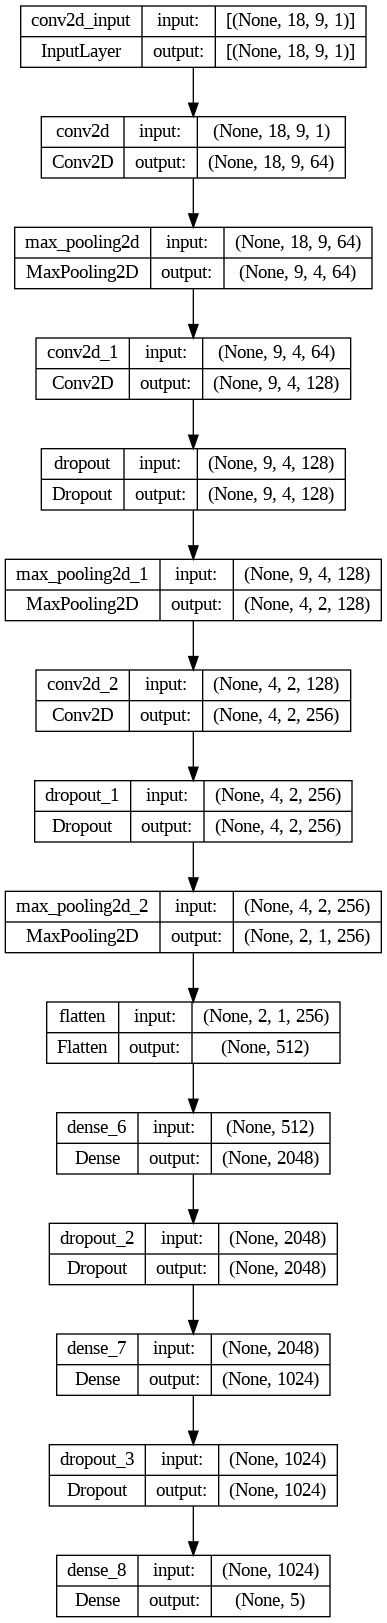

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(teacher, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

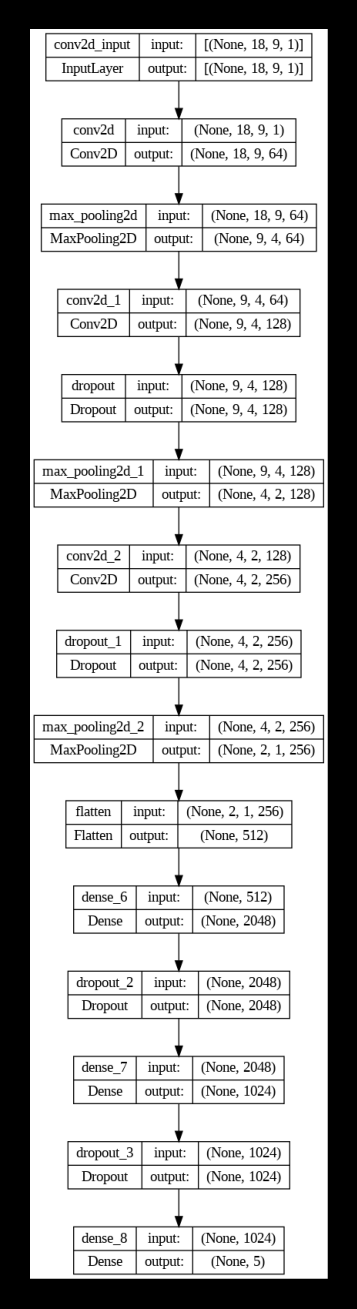

In [ ]:
from PIL import Image

# Load the PNG image
image_path = '/content/model_plot.png'
image = Image.open(image_path)
#image=a

# Create a figure and plot the image
fig, ax = plt.subplots(figsize=(image.width / 300, image.height / 300), dpi=300)
ax.imshow(image)

# Remove axis ticks and labels
ax.axis('off')

# Save the plot as EPS file with 300 dpi resolution
eps_path = 'image1.eps'
plt.savefig(eps_path, format='eps', dpi=300)

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.7 MB/s eta 0:00:00


In [ ]:
import visualkeras
visualkeras.layered_view(teacher)
plt.figure(dpi=300)

# Save the plot in EPS format with 300 DPI
#plt.savefig('layred view.eps', format='eps')

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [ ]:
pip install keras-visualizer

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.13.1 which is incompatible.


In [ ]:
import shap
explainer = shap.Explainer(teacher.predict, X_test)
print(explainer)

shap.explainers.Permutation()


In [ ]:
explainer = shap.DeepExplainer(teacher, X_train)
shap_values = explainer.shap_values(X_test)


In [ ]:
# plot SHAP values
#plot_actual_predicted(images_dict, predicted_class)
#print()
shap.image_plot(shap_values, X_test)

In [ ]:
distill_teacher_Check= tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_distill_Conv2D_model")

In [ ]:
#compile1_loss = "kullback_leibler_divergence"

In [ ]:
import tensorflow as tf
import numpy as np

def kl_divergence(y_true, y_pred):
    y_true = tf.dtypes.cast(y_true, tf.float32)
    y_pred = tf.dtypes.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.keras.losses.kullback_leibler_divergence(y_true, y_pred))

# Usage example:
# distillation_loss_fn = kl_divergence


In [ ]:
student_loss_fn = keras.losses.CategoricalCrossentropy()
distillation_loss_fn = kl_divergence

In [ ]:
# Initialize and compile distiller
distiller = Distiller( student=student, teacher=teacher)
distiller.compile(
   optimizer=compile_optimizer,student_loss_fn=student_loss_fn,metrics=compile_metrics,
  distillation_loss_fn = distillation_loss_fn,
    alpha=0.1,
    temperature=10,
)



In [ ]:
#print(X_test)

In [ ]:
print(Y_train)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
callback = keras.callbacks.Callback()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Assuming you have already compiled your deep learning model and have the dataset loaded into X_train, Y_train, X_test, Y_test

# Define cross-validation parameters
num_folds = 5

# Create the KFold object
kf = KFold(n_splits=num_folds, shuffle=True)

fold_scores = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}:")

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train the model
    history=distiller.fit(X_train, Y_train, batch_size=64, epochs=10,validation_data=(X_test, Y_test),callbacks=[Early_Stopper,callback])
    # Evaluate the model on the validation set
    score = distiller.evaluate(X_val_fold, Y_val_fold, verbose=0)
    fold_scores.append(score[0])  # Append validation accuracy to fold_scores list

    print(f"Fold {fold + 1} - Validation Accuracy: {score[1]}")

# Calculate the mean and standard deviation of the validation accuracies
mean_accuracy = np.mean(fold_scores)
std_accuracy = np.std(fold_scores)
print(f"\nMean Cross-Validation Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

# After cross-validation, you can evaluate your model on the test set
test_score = distiller.evaluate(X_test, Y_test, verbose=0)
print(f"\nTest Accuracy: {test_score[0]}")

Fold 1:
Epoch 1/10


KeyError: ignored

In [ ]:
# Distill teacher to student
history=distiller.fit(X_train, Y_train, batch_size=64, epochs=70,validation_data=(X_test, Y_test),callbacks=[Early_Stopper,callback])


# Retrieve the accuracy and loss values for each epoch
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['student_loss']
#val_loss = history.history['val_loss']
loss_list_distiller=[]
accuracy_list_distiller=[]
# Print the accuracy and loss values for each epoch
for epoch in range(len(accuracy)):
    #print("Epoch", epoch+1)
    #print("  Accuracy:", accuracy[epoch])
    loss_list_distiller.append(loss[epoch])
    accuracy_list_distiller.append(accuracy[epoch])
    #print("  Validation Accuracy:", val_accuracy[epoch])
    #print("  Loss:", loss[epoch])
    #print("  Validation Loss:", val_loss[epoch])
#print(loss_list)
#print(accuracy_list)

# Output CSV file path
csv_file = 'LOSS_ACCURACY_KD_Conv2D_distiller.csv'

# Write the file names to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['LOSS', 'ACCURACY'])  # Write header
    for i in range(len(loss_list_distiller)):
        writer.writerow([loss_list_distiller[i], accuracy_list_distiller[i]])

print('File names have been written to', csv_file)

Epoch 1/70


KeyError: ignored

In [ ]:
Model_Results_Conv2D = distiller.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[1])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[0])

9/9 [==============================] - 0s 7ms/step - accuracy: 0.7799 - student_loss: 0.8575
LOSS:  0.2237
ACCURACY:  0.7799


In [ ]:
student_scratch_Check= tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_student_scratch_Conv2D_model")

In [ ]:
student_scratch.compile(
   optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)


In [ ]:
history=student_scratch.fit(X_train, Y_train, batch_size=64, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,student_scratch_Check])

# Retrieve the accuracy and loss values for each epoch
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
loss_list_scratch=[]
accuracy_list_scratch=[]
# Print the accuracy and loss values for each epoch
for epoch in range(len(accuracy)):
    #print("Epoch", epoch+1)
    #print("  Accuracy:", accuracy[epoch])
    loss_list_scratch.append(loss[epoch])
    accuracy_list_scratch.append(accuracy[epoch])
    #print("  Validation Accuracy:", val_accuracy[epoch])
    #print("  Loss:", loss[epoch])
    #print("  Validation Loss:", val_loss[epoch])
#print(loss_list)
#print(accuracy_list)

# Output CSV file path
csv_file = 'LOSS_ACCURACY_KD_Conv2D_scratch.csv'

# Write the file names to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['LOSS', 'ACCURACY'])  # Write header
    for i in range(len(loss_list_scratch)):
        writer.writerow([loss_list_scratch[i], accuracy_list_scratch[i]])

print('File names have been written to', csv_file)

Epoch 1/70
37/37 [==============================] - ETA: 0s - loss: 4.6021 - accuracy: 0.6071

37/37 [==============================] - 4s 97ms/step - loss: 4.6021 - accuracy: 0.6071 - val_loss: 0.9862 - val_accuracy: 0.6718
Epoch 2/70
35/37 [===========================>..] - ETA: 0s - loss: 0.9076 - accuracy: 0.6924

37/37 [==============================] - 3s 75ms/step - loss: 0.9014 - accuracy: 0.6949 - val_loss: 0.8811 - val_accuracy: 0.6911
Epoch 3/70
37/37 [==============================] - ETA: 0s - loss: 0.8183 - accuracy: 0.7130

37/37 [==============================] - 2s 57ms/step - loss: 0.8183 - accuracy: 0.7130 - val_loss: 0.9554 - val_accuracy: 0.7066
Epoch 4/70
37/37 [==============================] - 1s 25ms/step - loss: 0.7929 - accuracy: 0.7233 - val_loss: 0.8879 - val_accuracy: 0.7066
Epoch 5/70
37/37 [==============================] - 1s 25ms/step - loss: 0.8320 - accuracy: 0.7250 - val_loss: 0.9899 - val_accuracy: 0.7027
Epoch 6/70
37/37 [==============================] - 1s 25ms/step - loss: 0.7958 - accuracy: 0.7216 - val_loss: 0.8482 - val_accuracy: 0.6950
Epoch 7/70
37/37 [==============================] - 1s 26ms/step - loss: 0.7946 - accuracy: 0.7298 - val_loss: 0.9465 - val_accuracy: 0.7027
File names have been written to LOSS_ACCURACY_KD_Conv2D_scratch.csv


In [ ]:
Model_Results_Conv2D = student_scratch.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_Conv2D[0])
print("ACCURACY:  " + "%.4f" % Model_Results_Conv2D[1])

9/9 [==============================] - 0s 5ms/step - loss: 0.9465 - accuracy: 0.7027
LOSS:  0.9465
ACCURACY:  0.7027


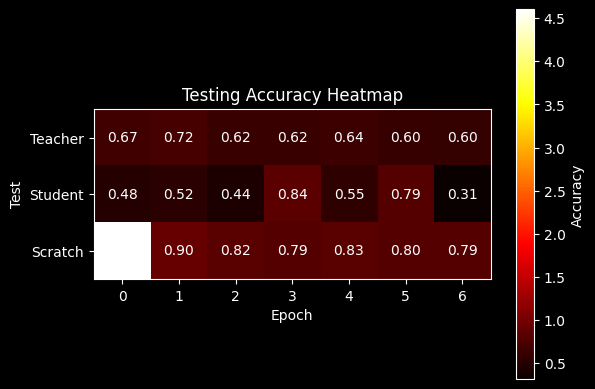

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

l=min(len(loss_list),len(loss_list_distiller),len(loss_list_scratch))
# Example accuracy values
accuracy_values = np.array([loss_list[:l],
                          loss_list_distiller[:l],
                          loss_list_scratch[:l]])

# Create a heatmap
plt.imshow(accuracy_values, cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Accuracy')

# Set tick labels and axis labels
#plt.xticks(np.arange(5), ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4','Epoch 5'])
plt.yticks(np.arange(3), ['Teacher', 'Student', 'Scratch'])
plt.xlabel('Epoch')
plt.ylabel('Test')

# Add text annotations
for i in range(accuracy_values.shape[0]):
    for j in range(accuracy_values.shape[1]):
        plt.text(j, i, "{:.2f}".format(accuracy_values[i, j]), ha='center', va='center', color='white')

# Show the plot
plt.title('Testing Accuracy Heatmap')

plt.figure(dpi=300)

# Save the plot in EPS format with 300 dpi resolution
plt.savefig('plot.eps', format='eps', dpi=300)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 5ms/step
Precision: 0.46779573367808663
Recall: 0.3825045196445395
F-score: 0.33879374565963083


In [ ]:
student_weight=distiller.layers[1].get_weights()
student_scratch.set_weights(student_weight)
student_scratch.save('student_distilled')
student_scratch.save_weights('student_distilled_weights.h5')

student_scratch.save('student_distilled.h5')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 4ms/step
Precision: 0.6422861163227017
Recall: 0.6452575560817865
F-score: 0.5988804137039432


In [ ]:
teacher.summary()

Model: "teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 9, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 4, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 9, 4, 128)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 256)         2951

In [ ]:
student_scratch.summary()

Model: "student_scratch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 18, 9, 32)         320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 4, 64)          18496     
                                                                 
 dropout_6 (Dropout)         (None, 9, 4, 64)          0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)           

In [ ]:
student.summary()

Model: "student"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 18, 9, 32)         320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 4, 64)          18496     
                                                                 
 dropout_4 (Dropout)         (None, 9, 4, 64)          0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0   

Knowledge Distillation on Conv1D

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
tf.random.set_seed(3)


In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(Values_X,Labels_X_Encode,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

torch.Size([2324, 162])
torch.Size([2324, 5])
torch.Size([259, 162])
torch.Size([259, 5])


In [ ]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)
print(xTrain.shape)
print(xTest.shape)

(2324, 162, 1)
(259, 162, 1)


In [ ]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (xTrain.shape[1],1)
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

TypeError: ignored

In [ ]:
# Create the teacher
teacher =keras.Sequential([
    keras.layers.Conv1D(256, 5, strides=1, padding="same", activation="relu", input_shape=input_shape_dim),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(256, 4, strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(128, 4, strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(64, 4, strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(32, 4, strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(units=output_dim, activation='softmax')
],

    name="teacher",
)

# Create the student
student = keras.Sequential([
        keras.layers.Conv1D(64, 5, strides=1, padding="same", activation="relu", input_shape=input_shape_dim),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(64, 4, strides=1, padding="same", activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(32, 4, strides=1, padding="same", activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(units=output_dim, activation='softmax')
    ],
    name="student",
)

# Clone student for later comparison
student_scratch =keras.Sequential([
        keras.layers.Conv1D(64, 5, strides=1, padding="same", activation="relu", input_shape=input_shape_dim),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(64, 4, strides=1, padding="same", activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(32, 4, strides=1, padding="same", activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(units=output_dim, activation='softmax')
    ],
    name="student_scratch",)

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
student_Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./student_modelcheck")
student_scratch_Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./student_scratch_modelcheck")

In [ ]:
teacher.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
teacher.fit(xTrain, yTrain,
                         batch_size=12,
                         epochs=70,
                                validation_data=(xTest, yTest), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
194/194 [==============================] - 21s 99ms/step - loss: 1.3174 - accuracy: 0.6175 - val_loss: 1.2551 - val_accuracy: 0.6486
Epoch 2/70
194/194 [==============================] - 19s 97ms/step - loss: 1.0271 - accuracy: 0.6725 - val_loss: 1.0172 - val_accuracy: 0.6486
Epoch 3/70
194/194 [==============================] - 20s 105ms/step - loss: 0.8815 - accuracy: 0.6971 - val_loss: 0.9049 - val_accuracy: 0.7027
Epoch 4/70
194/194 [==============================] - 18s 92ms/step - loss: 0.8520 - accuracy: 0.6992 - val_loss: 0.9478 - val_accuracy: 0.6988
Epoch 5/70
194/194 [==============================] - 19s 96ms/step - loss: 0.8382 - accuracy: 0.7147 - val_loss: 0.8839 - val_accuracy: 0.6795
Epoch 6/70
194/194 [==============================] - 19s 98ms/step - loss: 0.7890 - accuracy: 0.7293 - val_loss: 0.9027 - val_accuracy: 0.6680
Epoch 7/70
194/194 [==============================] - 18s 92ms/step - loss: 0.7450 - accuracy: 0.7435 - val_loss: 0.8307 - val_accuracy

In [ ]:
Model_Results = teacher.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

9/9 [==============================] - 0s 39ms/step - loss: 0.7723 - accuracy: 0.7104
LOSS:  0.7723
ACCURACY:  0.7104


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=teacher.predict(xTest[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(xTest)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(yTest, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 35ms/step
Precision: 0.5264806866952789
Recall: 0.3777327935222672
F-score: 0.38200774380898606


In [ ]:
#teacher.evaluate(xTest,yTest)

In [ ]:
# Initialize and compile distiller
distiller = Distiller( student=student, teacher=teacher)
distiller.compile(
   optimizer=compile_optimizer,student_loss_fn=student_loss_fn,metrics=compile_metrics,
  distillation_loss_fn = distillation_loss_fn,
    alpha=0.1,
    temperature=10,
)

In [ ]:
distiller.fit(xTrain, yTrain,
                         batch_size=12,
                         epochs=70,
                                validation_data=(xTest, yTest), callbacks=[Early_Stopper,student_Checkpoint_Model])

Epoch 1/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.6438 - student_loss: 1.2478 - distillation_loss: 0.0138

194/194 [==============================] - 10s 46ms/step - accuracy: 0.6446 - student_loss: 1.2423 - distillation_loss: 0.0137 - val_accuracy: 0.6293 - val_student_loss: 0.9983
Epoch 2/70
194/194 [==============================] - ETA: 0s - accuracy: 0.6781 - student_loss: 0.8908 - distillation_loss: 0.0076

194/194 [==============================] - 6s 33ms/step - accuracy: 0.6781 - student_loss: 0.8896 - distillation_loss: 0.0076 - val_accuracy: 0.7027 - val_student_loss: 0.7310
Epoch 3/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7021 - student_loss: 0.8192 - distillation_loss: 0.0058

194/194 [==============================] - 8s 44ms/step - accuracy: 0.7027 - student_loss: 0.8154 - distillation_loss: 0.0058 - val_accuracy: 0.7027 - val_student_loss: 0.6712
Epoch 4/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7091 - student_loss: 0.8098 - distillation_loss: 0.0060

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7091 - student_loss: 0.8117 - distillation_loss: 0.0060 - val_accuracy: 0.7027 - val_student_loss: 0.5882
Epoch 5/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7121 - student_loss: 0.8005 - distillation_loss: 0.0053

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7121 - student_loss: 0.7990 - distillation_loss: 0.0052 - val_accuracy: 0.6950 - val_student_loss: 0.6890
Epoch 6/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7172 - student_loss: 0.7759 - distillation_loss: 0.0055

194/194 [==============================] - 6s 32ms/step - accuracy: 0.7177 - student_loss: 0.7744 - distillation_loss: 0.0055 - val_accuracy: 0.6988 - val_student_loss: 0.7544
Epoch 7/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7180 - student_loss: 0.7704 - distillation_loss: 0.0048

194/194 [==============================] - 9s 48ms/step - accuracy: 0.7186 - student_loss: 0.7678 - distillation_loss: 0.0048 - val_accuracy: 0.7143 - val_student_loss: 0.6007
Epoch 8/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7215 - student_loss: 0.7809 - distillation_loss: 0.0053

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7212 - student_loss: 0.7822 - distillation_loss: 0.0053 - val_accuracy: 0.7220 - val_student_loss: 0.6057
Epoch 9/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7298 - student_loss: 0.7526 - distillation_loss: 0.0045

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7298 - student_loss: 0.7544 - distillation_loss: 0.0045 - val_accuracy: 0.7066 - val_student_loss: 0.5685
Epoch 10/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7353 - student_loss: 0.7476 - distillation_loss: 0.0041

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7349 - student_loss: 0.7474 - distillation_loss: 0.0041 - val_accuracy: 0.7220 - val_student_loss: 0.6171
Epoch 11/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7340 - student_loss: 0.7385 - distillation_loss: 0.0047

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7341 - student_loss: 0.7376 - distillation_loss: 0.0047 - val_accuracy: 0.7104 - val_student_loss: 0.6402
Epoch 12/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7453 - student_loss: 0.7205 - distillation_loss: 0.0039

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7448 - student_loss: 0.7199 - distillation_loss: 0.0039 - val_accuracy: 0.7220 - val_student_loss: 0.5584
Epoch 13/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7414 - student_loss: 0.7257 - distillation_loss: 0.0041

194/194 [==============================] - 10s 52ms/step - accuracy: 0.7405 - student_loss: 0.7269 - distillation_loss: 0.0040 - val_accuracy: 0.7297 - val_student_loss: 0.5967
Epoch 14/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7500 - student_loss: 0.7169 - distillation_loss: 0.0041

194/194 [==============================] - 8s 39ms/step - accuracy: 0.7491 - student_loss: 0.7202 - distillation_loss: 0.0041 - val_accuracy: 0.7452 - val_student_loss: 0.6048
Epoch 15/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7491 - student_loss: 0.7123 - distillation_loss: 0.0037

194/194 [==============================] - 8s 42ms/step - accuracy: 0.7487 - student_loss: 0.7153 - distillation_loss: 0.0037 - val_accuracy: 0.7413 - val_student_loss: 0.5727
Epoch 16/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7504 - student_loss: 0.6953 - distillation_loss: 0.0033

194/194 [==============================] - 10s 49ms/step - accuracy: 0.7504 - student_loss: 0.6933 - distillation_loss: 0.0033 - val_accuracy: 0.7452 - val_student_loss: 0.5288
Epoch 17/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7552 - student_loss: 0.6815 - distillation_loss: 0.0035

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7552 - student_loss: 0.6807 - distillation_loss: 0.0035 - val_accuracy: 0.7529 - val_student_loss: 0.5125
Epoch 18/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7573 - student_loss: 0.6813 - distillation_loss: 0.0033

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7573 - student_loss: 0.6827 - distillation_loss: 0.0033 - val_accuracy: 0.7297 - val_student_loss: 0.5015
Epoch 19/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7633 - student_loss: 0.6707 - distillation_loss: 0.0030

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7633 - student_loss: 0.6683 - distillation_loss: 0.0030 - val_accuracy: 0.7413 - val_student_loss: 0.5005
Epoch 20/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7755 - student_loss: 0.6541 - distillation_loss: 0.0033

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7758 - student_loss: 0.6540 - distillation_loss: 0.0034 - val_accuracy: 0.7490 - val_student_loss: 0.4993
Epoch 21/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7712 - student_loss: 0.6571 - distillation_loss: 0.0030

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7707 - student_loss: 0.6576 - distillation_loss: 0.0030 - val_accuracy: 0.7490 - val_student_loss: 0.4701
Epoch 22/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7755 - student_loss: 0.6473 - distillation_loss: 0.0029

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7741 - student_loss: 0.6544 - distillation_loss: 0.0029 - val_accuracy: 0.7568 - val_student_loss: 0.4965
Epoch 23/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7732 - student_loss: 0.6503 - distillation_loss: 0.0035

194/194 [==============================] - 9s 44ms/step - accuracy: 0.7732 - student_loss: 0.6490 - distillation_loss: 0.0035 - val_accuracy: 0.7452 - val_student_loss: 0.4940
Epoch 24/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7651 - student_loss: 0.6491 - distillation_loss: 0.0030

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7646 - student_loss: 0.6506 - distillation_loss: 0.0030 - val_accuracy: 0.7606 - val_student_loss: 0.4684
Epoch 25/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7781 - student_loss: 0.6364 - distillation_loss: 0.0033

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7780 - student_loss: 0.6366 - distillation_loss: 0.0033 - val_accuracy: 0.7683 - val_student_loss: 0.4847
Epoch 26/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7694 - student_loss: 0.6596 - distillation_loss: 0.0040

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7698 - student_loss: 0.6576 - distillation_loss: 0.0040 - val_accuracy: 0.7606 - val_student_loss: 0.5642
Epoch 27/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7788 - student_loss: 0.6369 - distillation_loss: 0.0030

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7788 - student_loss: 0.6360 - distillation_loss: 0.0030 - val_accuracy: 0.7606 - val_student_loss: 0.5134
Epoch 28/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7763 - student_loss: 0.6256 - distillation_loss: 0.0030

194/194 [==============================] - 7s 35ms/step - accuracy: 0.7762 - student_loss: 0.6258 - distillation_loss: 0.0030 - val_accuracy: 0.7761 - val_student_loss: 0.5563
Epoch 29/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7802 - student_loss: 0.6333 - distillation_loss: 0.0033

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7806 - student_loss: 0.6307 - distillation_loss: 0.0033 - val_accuracy: 0.7683 - val_student_loss: 0.4745
Epoch 30/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7845 - student_loss: 0.6203 - distillation_loss: 0.0035

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7853 - student_loss: 0.6157 - distillation_loss: 0.0035 - val_accuracy: 0.7568 - val_student_loss: 0.5362
Epoch 31/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7772 - student_loss: 0.6327 - distillation_loss: 0.0035

194/194 [==============================] - 10s 49ms/step - accuracy: 0.7775 - student_loss: 0.6293 - distillation_loss: 0.0035 - val_accuracy: 0.7529 - val_student_loss: 0.4646
Epoch 32/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7880 - student_loss: 0.6210 - distillation_loss: 0.0035

194/194 [==============================] - 8s 39ms/step - accuracy: 0.7879 - student_loss: 0.6224 - distillation_loss: 0.0034 - val_accuracy: 0.7645 - val_student_loss: 0.5381
Epoch 33/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7810 - student_loss: 0.6288 - distillation_loss: 0.0037

194/194 [==============================] - 8s 44ms/step - accuracy: 0.7810 - student_loss: 0.6295 - distillation_loss: 0.0037 - val_accuracy: 0.7529 - val_student_loss: 0.4856
Epoch 34/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7832 - student_loss: 0.6247 - distillation_loss: 0.0034

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7823 - student_loss: 0.6328 - distillation_loss: 0.0034 - val_accuracy: 0.7568 - val_student_loss: 0.4937
Epoch 35/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7876 - student_loss: 0.6160 - distillation_loss: 0.0039

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7874 - student_loss: 0.6175 - distillation_loss: 0.0039 - val_accuracy: 0.7683 - val_student_loss: 0.5376
Epoch 36/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7758 - student_loss: 0.6290 - distillation_loss: 0.0036

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7758 - student_loss: 0.6296 - distillation_loss: 0.0036 - val_accuracy: 0.7722 - val_student_loss: 0.4684
Epoch 37/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7854 - student_loss: 0.6108 - distillation_loss: 0.0036

194/194 [==============================] - 8s 44ms/step - accuracy: 0.7853 - student_loss: 0.6108 - distillation_loss: 0.0035 - val_accuracy: 0.7722 - val_student_loss: 0.5265
Epoch 38/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7896 - student_loss: 0.6107 - distillation_loss: 0.0037

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7896 - student_loss: 0.6103 - distillation_loss: 0.0037 - val_accuracy: 0.7568 - val_student_loss: 0.4862
Epoch 39/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7919 - student_loss: 0.6083 - distillation_loss: 0.0035

194/194 [==============================] - 8s 43ms/step - accuracy: 0.7926 - student_loss: 0.6039 - distillation_loss: 0.0035 - val_accuracy: 0.7645 - val_student_loss: 0.4753
Epoch 40/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7850 - student_loss: 0.6188 - distillation_loss: 0.0038

194/194 [==============================] - 7s 35ms/step - accuracy: 0.7853 - student_loss: 0.6181 - distillation_loss: 0.0037 - val_accuracy: 0.7490 - val_student_loss: 0.4591
Epoch 41/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7919 - student_loss: 0.6146 - distillation_loss: 0.0038

194/194 [==============================] - 8s 41ms/step - accuracy: 0.7922 - student_loss: 0.6132 - distillation_loss: 0.0038 - val_accuracy: 0.7722 - val_student_loss: 0.4877
Epoch 42/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7863 - student_loss: 0.6065 - distillation_loss: 0.0038

194/194 [==============================] - 7s 35ms/step - accuracy: 0.7861 - student_loss: 0.6060 - distillation_loss: 0.0038 - val_accuracy: 0.7645 - val_student_loss: 0.4624
Epoch 43/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7884 - student_loss: 0.6036 - distillation_loss: 0.0037

194/194 [==============================] - 8s 41ms/step - accuracy: 0.7892 - student_loss: 0.5997 - distillation_loss: 0.0037 - val_accuracy: 0.7761 - val_student_loss: 0.4842
Epoch 44/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7887 - student_loss: 0.6091 - distillation_loss: 0.0040

194/194 [==============================] - 7s 39ms/step - accuracy: 0.7887 - student_loss: 0.6095 - distillation_loss: 0.0040 - val_accuracy: 0.7876 - val_student_loss: 0.5007
Epoch 45/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7893 - student_loss: 0.5963 - distillation_loss: 0.0038

194/194 [==============================] - 8s 39ms/step - accuracy: 0.7896 - student_loss: 0.5949 - distillation_loss: 0.0037 - val_accuracy: 0.7606 - val_student_loss: 0.4799
Epoch 46/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7940 - student_loss: 0.5924 - distillation_loss: 0.0037

194/194 [==============================] - 7s 37ms/step - accuracy: 0.7926 - student_loss: 0.6030 - distillation_loss: 0.0037 - val_accuracy: 0.7568 - val_student_loss: 0.4869
Epoch 47/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7876 - student_loss: 0.6024 - distillation_loss: 0.0040

194/194 [==============================] - 7s 38ms/step - accuracy: 0.7879 - student_loss: 0.6005 - distillation_loss: 0.0041 - val_accuracy: 0.7683 - val_student_loss: 0.4600
Epoch 48/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7850 - student_loss: 0.5984 - distillation_loss: 0.0038

194/194 [==============================] - 8s 39ms/step - accuracy: 0.7857 - student_loss: 0.5936 - distillation_loss: 0.0038 - val_accuracy: 0.7799 - val_student_loss: 0.4557
Epoch 49/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7902 - student_loss: 0.5937 - distillation_loss: 0.0039

194/194 [==============================] - 7s 36ms/step - accuracy: 0.7900 - student_loss: 0.5929 - distillation_loss: 0.0039 - val_accuracy: 0.7722 - val_student_loss: 0.4688
Epoch 50/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7939 - student_loss: 0.5853 - distillation_loss: 0.0042

194/194 [==============================] - 10s 52ms/step - accuracy: 0.7939 - student_loss: 0.5867 - distillation_loss: 0.0043 - val_accuracy: 0.7683 - val_student_loss: 0.4890
Epoch 51/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7949 - student_loss: 0.5891 - distillation_loss: 0.0040

194/194 [==============================] - 9s 46ms/step - accuracy: 0.7952 - student_loss: 0.5871 - distillation_loss: 0.0039 - val_accuracy: 0.7645 - val_student_loss: 0.4838
Epoch 52/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7887 - student_loss: 0.6103 - distillation_loss: 0.0042

194/194 [==============================] - 7s 35ms/step - accuracy: 0.7887 - student_loss: 0.6094 - distillation_loss: 0.0042 - val_accuracy: 0.7645 - val_student_loss: 0.4712
Epoch 53/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7915 - student_loss: 0.6174 - distillation_loss: 0.0044

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7913 - student_loss: 0.6179 - distillation_loss: 0.0044 - val_accuracy: 0.7606 - val_student_loss: 0.4354
Epoch 54/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7958 - student_loss: 0.5952 - distillation_loss: 0.0041

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7965 - student_loss: 0.5905 - distillation_loss: 0.0041 - val_accuracy: 0.7722 - val_student_loss: 0.4667
Epoch 55/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7889 - student_loss: 0.5918 - distillation_loss: 0.0041

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7892 - student_loss: 0.5915 - distillation_loss: 0.0042 - val_accuracy: 0.7683 - val_student_loss: 0.4771
Epoch 56/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7893 - student_loss: 0.6006 - distillation_loss: 0.0042

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7892 - student_loss: 0.5996 - distillation_loss: 0.0041 - val_accuracy: 0.7490 - val_student_loss: 0.4430
Epoch 57/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7927 - student_loss: 0.5790 - distillation_loss: 0.0045

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7926 - student_loss: 0.5855 - distillation_loss: 0.0045 - val_accuracy: 0.7683 - val_student_loss: 0.4738
Epoch 58/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7930 - student_loss: 0.5892 - distillation_loss: 0.0047

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7930 - student_loss: 0.5893 - distillation_loss: 0.0048 - val_accuracy: 0.7606 - val_student_loss: 0.4938
Epoch 59/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7889 - student_loss: 0.5999 - distillation_loss: 0.0042

194/194 [==============================] - 9s 46ms/step - accuracy: 0.7883 - student_loss: 0.6025 - distillation_loss: 0.0042 - val_accuracy: 0.7761 - val_student_loss: 0.4617
Epoch 60/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7971 - student_loss: 0.5837 - distillation_loss: 0.0042

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7969 - student_loss: 0.5823 - distillation_loss: 0.0042 - val_accuracy: 0.7568 - val_student_loss: 0.4537
Epoch 61/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7927 - student_loss: 0.5856 - distillation_loss: 0.0041

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7935 - student_loss: 0.5821 - distillation_loss: 0.0041 - val_accuracy: 0.7838 - val_student_loss: 0.4678
Epoch 62/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7965 - student_loss: 0.5794 - distillation_loss: 0.0041

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7965 - student_loss: 0.5779 - distillation_loss: 0.0041 - val_accuracy: 0.7606 - val_student_loss: 0.4603
Epoch 63/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.5776 - distillation_loss: 0.0045

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7960 - student_loss: 0.5773 - distillation_loss: 0.0045 - val_accuracy: 0.7683 - val_student_loss: 0.4803
Epoch 64/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7982 - student_loss: 0.5834 - distillation_loss: 0.0041

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7982 - student_loss: 0.5823 - distillation_loss: 0.0041 - val_accuracy: 0.7799 - val_student_loss: 0.4755
Epoch 65/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7958 - student_loss: 0.5755 - distillation_loss: 0.0044

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7965 - student_loss: 0.5718 - distillation_loss: 0.0044 - val_accuracy: 0.7683 - val_student_loss: 0.4745
Epoch 66/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7958 - student_loss: 0.5675 - distillation_loss: 0.0045

194/194 [==============================] - 7s 34ms/step - accuracy: 0.7960 - student_loss: 0.5679 - distillation_loss: 0.0045 - val_accuracy: 0.7722 - val_student_loss: 0.4633
Epoch 67/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7979 - student_loss: 0.5664 - distillation_loss: 0.0045

194/194 [==============================] - 9s 46ms/step - accuracy: 0.7978 - student_loss: 0.5688 - distillation_loss: 0.0045 - val_accuracy: 0.7722 - val_student_loss: 0.5024
Epoch 68/70
193/194 [============================>.] - ETA: 0s - accuracy: 0.7971 - student_loss: 0.5680 - distillation_loss: 0.0045

194/194 [==============================] - 9s 45ms/step - accuracy: 0.7973 - student_loss: 0.5665 - distillation_loss: 0.0045 - val_accuracy: 0.7683 - val_student_loss: 0.4870
Epoch 69/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.5781 - distillation_loss: 0.0045

194/194 [==============================] - 9s 46ms/step - accuracy: 0.7960 - student_loss: 0.5794 - distillation_loss: 0.0045 - val_accuracy: 0.7606 - val_student_loss: 0.4703
Epoch 70/70
194/194 [==============================] - ETA: 0s - accuracy: 0.7978 - student_loss: 0.5675 - distillation_loss: 0.0045

194/194 [==============================] - 6s 33ms/step - accuracy: 0.7978 - student_loss: 0.5692 - distillation_loss: 0.0044 - val_accuracy: 0.7645 - val_student_loss: 0.4980


In [ ]:
Model_Results = distiller.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[1])
print("ACCURACY:  " + "%.4f" % Model_Results[0])

9/9 [==============================] - 0s 8ms/step - accuracy: 0.7645 - student_loss: 0.5809
LOSS:  0.2646
ACCURACY:  0.7645


In [ ]:
#distiller.evaluate(xTest,yTest)

In [ ]:
teacher.summary()

Model: "teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout_8 (Dropout)         (None, 81, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0   

In [ ]:
student.summary()

Model: "student"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 162, 64)           384       
                                                                 
 batch_normalization_1 (Batc  (None, 162, 64)          256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 81, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 81, 64)            16448     
                                                                 
 dropout_13 (Dropout)        (None, 81, 64)            0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 41, 64)           0   

In [ ]:
student_scratch.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
student_scratch.fit(xTrain, yTrain,
                         batch_size=12,
                         epochs=70,
                                validation_data=(xTest, yTest), callbacks=[Early_Stopper,student_scratch_Checkpoint_Model])

Epoch 1/70
194/194 [==============================] - 5s 21ms/step - loss: 1.1308 - accuracy: 0.6450 - val_loss: 0.8451 - val_accuracy: 0.7027
Epoch 2/70
194/194 [==============================] - 5s 25ms/step - loss: 0.9707 - accuracy: 0.6523 - val_loss: 0.8532 - val_accuracy: 0.6564
Epoch 3/70
194/194 [==============================] - 4s 21ms/step - loss: 0.8705 - accuracy: 0.6781 - val_loss: 0.8627 - val_accuracy: 0.6873
Epoch 4/70
194/194 [==============================] - 4s 19ms/step - loss: 0.8280 - accuracy: 0.6975 - val_loss: 0.8172 - val_accuracy: 0.7027
Epoch 5/70
194/194 [==============================] - 4s 19ms/step - loss: 0.8049 - accuracy: 0.7048 - val_loss: 0.8028 - val_accuracy: 0.6950
Epoch 6/70
194/194 [==============================] - 6s 28ms/step - loss: 0.7874 - accuracy: 0.7134 - val_loss: 0.8132 - val_accuracy: 0.7104
Epoch 7/70
194/194 [==============================] - 4s 20ms/step - loss: 0.7728 - accuracy: 0.7190 - val_loss: 0.7968 - val_accuracy: 0.6988

In [ ]:
Model_Results = student_scratch.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

9/9 [==============================] - 0s 13ms/step - loss: 0.6880 - accuracy: 0.7568
LOSS:  0.6880
ACCURACY:  0.7568


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(xTest[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(xTest)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(yTest, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 9ms/step
Precision: 0.5983154717910816
Recall: 0.5877710725774281
F-score: 0.5450943988625929


In [ ]:
student_weight=distiller.layers[1].get_weights()
student_scratch.set_weights(student_weight)
student_scratch.save('student_distilled')
student_scratch.save_weights('student_distilled_weights.h5')

student_scratch.save('student_distilled.h5')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(xTest[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(xTest)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(yTest, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 9ms/step
Precision: 0.6683568075117371
Recall: 0.6177704784457516
F-score: 0.5772127925504001


Knowledge distillation on MODEL STRUCTURE WITH RNN - SEPCNN

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 162)
(2324, 5)
(259, 162)
(259, 5)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 18, 9, 1)
X_test = X_test.reshape(X_test.shape[0], 18, 9, 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 18, 9, 1)
(2324, 5)
(259, 18, 9, 1)
(259, 5)


In [ ]:
Model_Check_RNN_SEPCNN = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_RNN_SEPCNN_model")
student_Model_Check_RNN_SEPCNN = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_my_RNN_SEPCNN_model")
student_scratch_Model_Check_RNN_SEPCNN = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_scratch_my_RNN_SEPCNN_model")

In [ ]:
# Create the teacher
teacher =keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.TimeDistributed(keras.layers.Flatten()),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(output_dim, activation="softmax")
],

    name="teacher",
)

# Create the student
student = keras.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.TimeDistributed(keras.layers.Flatten()),
        keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
        keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),

        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(output_dim, activation="softmax")
    ],
    name="student",
)

# Clone student for later comparison
student_scratch =keras.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.TimeDistributed(keras.layers.Flatten()),
        keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
        keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),

        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(output_dim, activation="softmax")
    ],
    name="student_scratch",)

In [ ]:
teacher.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
teacher.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_RNN_SEPCNN])

Epoch 1/70
72/73 [============================>.] - ETA: 0s - loss: 1.1036 - accuracy: 0.6476

73/73 [==============================] - 42s 412ms/step - loss: 1.0997 - accuracy: 0.6493 - val_loss: 0.8562 - val_accuracy: 0.7027
Epoch 2/70
73/73 [==============================] - ETA: 0s - loss: 0.9080 - accuracy: 0.6923

73/73 [==============================] - 28s 388ms/step - loss: 0.9080 - accuracy: 0.6923 - val_loss: 0.8464 - val_accuracy: 0.7066
Epoch 3/70
73/73 [==============================] - 4s 48ms/step - loss: 0.8466 - accuracy: 0.7040 - val_loss: 0.8082 - val_accuracy: 0.7027
Epoch 4/70
73/73 [==============================] - 5s 66ms/step - loss: 0.8133 - accuracy: 0.7130 - val_loss: 0.8345 - val_accuracy: 0.7027
Epoch 5/70
73/73 [==============================] - ETA: 0s - loss: 0.7983 - accuracy: 0.7225

73/73 [==============================] - 28s 392ms/step - loss: 0.7983 - accuracy: 0.7225 - val_loss: 0.8201 - val_accuracy: 0.7104
Epoch 6/70
73/73 [==============================] - ETA: 0s - loss: 0.7823 - accuracy: 0.7281

73/73 [==============================] - 26s 360ms/step - loss: 0.7823 - accuracy: 0.7281 - val_loss: 0.7687 - val_accuracy: 0.7452
Epoch 7/70
73/73 [==============================] - 6s 79ms/step - loss: 0.7585 - accuracy: 0.7392 - val_loss: 0.7830 - val_accuracy: 0.7259
Epoch 8/70
73/73 [==============================] - 3s 47ms/step - loss: 0.7401 - accuracy: 0.7315 - val_loss: 0.7634 - val_accuracy: 0.7297
Epoch 9/70
73/73 [==============================] - 3s 47ms/step - loss: 0.7239 - accuracy: 0.7444 - val_loss: 0.7503 - val_accuracy: 0.7413
Epoch 10/70
73/73 [==============================] - 4s 58ms/step - loss: 0.7236 - accuracy: 0.7478 - val_loss: 0.7881 - val_accuracy: 0.7297
Epoch 11/70
73/73 [==============================] - 5s 67ms/step - loss: 0.7151 - accuracy: 0.7556 - val_loss: 0.7653 - val_accuracy: 0.7336
Epoch 12/70
73/73 [==============================] - 4s 49ms/step - loss: 0.7064 - accuracy: 0.7573 - val_loss: 0.7641 - val_accuracy: 0.7452
Epoch 13/70
73/73 [

73/73 [==============================] - 27s 380ms/step - loss: 0.6940 - accuracy: 0.7620 - val_loss: 0.7330 - val_accuracy: 0.7490
Epoch 16/70
73/73 [==============================] - 4s 54ms/step - loss: 0.6729 - accuracy: 0.7681 - val_loss: 0.7395 - val_accuracy: 0.7452
Epoch 17/70
73/73 [==============================] - 4s 57ms/step - loss: 0.6725 - accuracy: 0.7638 - val_loss: 0.7102 - val_accuracy: 0.7490
Epoch 18/70
73/73 [==============================] - 6s 85ms/step - loss: 0.6688 - accuracy: 0.7685 - val_loss: 0.7536 - val_accuracy: 0.7452
Epoch 19/70
73/73 [==============================] - 4s 57ms/step - loss: 0.6474 - accuracy: 0.7728 - val_loss: 0.7448 - val_accuracy: 0.7490
Epoch 20/70
73/73 [==============================] - 3s 48ms/step - loss: 0.6677 - accuracy: 0.7732 - val_loss: 0.7162 - val_accuracy: 0.7452
Epoch 21/70
73/73 [==============================] - 4s 51ms/step - loss: 0.6463 - accuracy: 0.7767 - val_loss: 0.7254 - val_accuracy: 0.7490
Epoch 22/70
72/7

73/73 [==============================] - 27s 376ms/step - loss: 0.6410 - accuracy: 0.7810 - val_loss: 0.7044 - val_accuracy: 0.7568
Epoch 23/70
73/73 [==============================] - ETA: 0s - loss: 0.6487 - accuracy: 0.7806

73/73 [==============================] - 27s 381ms/step - loss: 0.6487 - accuracy: 0.7806 - val_loss: 0.6915 - val_accuracy: 0.7645
Epoch 24/70
73/73 [==============================] - 4s 49ms/step - loss: 0.6440 - accuracy: 0.7780 - val_loss: 0.7015 - val_accuracy: 0.7606
Epoch 25/70
73/73 [==============================] - ETA: 0s - loss: 0.6431 - accuracy: 0.7801

73/73 [==============================] - 28s 382ms/step - loss: 0.6431 - accuracy: 0.7801 - val_loss: 0.6867 - val_accuracy: 0.7683


In [ ]:
Model_Results_RNN_SEPCNN = teacher.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_RNN_SEPCNN[0])
print("ACCURACY:  " + "%.4f" % Model_Results_RNN_SEPCNN[1])

9/9 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.7683
LOSS:  0.6867
ACCURACY:  0.7683


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 2s 16ms/step
Precision: 0.6191449524106725
Recall: 0.643913120973697
F-score: 0.5872094864295059


In [ ]:
# Initialize and compile distiller
distiller = Distiller( student=student, teacher=teacher)
distiller.compile(
   optimizer=compile_optimizer,student_loss_fn=student_loss_fn,metrics=compile_metrics,
  distillation_loss_fn = distillation_loss_fn,
    alpha=0.1,
    temperature=10,
)

In [ ]:
distiller.fit(X_train, Y_train,

                         epochs=70,
                                validation_data=(X_test, Y_test),callbacks=[Early_Stopper,callback])

Epoch 1/70
73/73 [==============================] - ETA: 0s - accuracy: 0.6558 - student_loss: 1.0607 - distillation_loss: 0.0214

73/73 [==============================] - 19s 61ms/step - accuracy: 0.6558 - student_loss: 1.0543 - distillation_loss: 0.0212 - val_accuracy: 0.6911 - val_student_loss: 0.7933
Epoch 2/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7061 - student_loss: 0.8622 - distillation_loss: 0.0127

73/73 [==============================] - 5s 62ms/step - accuracy: 0.7061 - student_loss: 0.8600 - distillation_loss: 0.0126 - val_accuracy: 0.7027 - val_student_loss: 0.4624
Epoch 3/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7231 - student_loss: 0.7847 - distillation_loss: 0.0089

73/73 [==============================] - 3s 38ms/step - accuracy: 0.7233 - student_loss: 0.7796 - distillation_loss: 0.0090 - val_accuracy: 0.7297 - val_student_loss: 0.5766
Epoch 4/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7401 - student_loss: 0.7517 - distillation_loss: 0.0071

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7401 - student_loss: 0.7540 - distillation_loss: 0.0070 - val_accuracy: 0.7259 - val_student_loss: 0.1671
Epoch 5/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7509 - student_loss: 0.7251 - distillation_loss: 0.0060

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7509 - student_loss: 0.7239 - distillation_loss: 0.0059 - val_accuracy: 0.7220 - val_student_loss: 0.1345
Epoch 6/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7569 - student_loss: 0.7174 - distillation_loss: 0.0050

73/73 [==============================] - 5s 70ms/step - accuracy: 0.7569 - student_loss: 0.7156 - distillation_loss: 0.0050 - val_accuracy: 0.7413 - val_student_loss: 0.1854
Epoch 7/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7548 - student_loss: 0.7166 - distillation_loss: 0.0050

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7552 - student_loss: 0.7115 - distillation_loss: 0.0051 - val_accuracy: 0.7259 - val_student_loss: 0.1370
Epoch 8/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7539 - student_loss: 0.7020 - distillation_loss: 0.0045

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7539 - student_loss: 0.7012 - distillation_loss: 0.0045 - val_accuracy: 0.7490 - val_student_loss: 0.1882
Epoch 9/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7681 - student_loss: 0.6811 - distillation_loss: 0.0036

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7681 - student_loss: 0.6799 - distillation_loss: 0.0036 - val_accuracy: 0.7413 - val_student_loss: 0.1433
Epoch 10/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7629 - student_loss: 0.6851 - distillation_loss: 0.0037

73/73 [==============================] - 4s 56ms/step - accuracy: 0.7629 - student_loss: 0.6854 - distillation_loss: 0.0038 - val_accuracy: 0.7606 - val_student_loss: 0.2221
Epoch 11/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7704 - student_loss: 0.6852 - distillation_loss: 0.0035

73/73 [==============================] - 4s 55ms/step - accuracy: 0.7694 - student_loss: 0.6873 - distillation_loss: 0.0035 - val_accuracy: 0.7452 - val_student_loss: 0.1458
Epoch 12/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7747 - student_loss: 0.6577 - distillation_loss: 0.0028

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7741 - student_loss: 0.6622 - distillation_loss: 0.0029 - val_accuracy: 0.7529 - val_student_loss: 0.1053
Epoch 13/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7715 - student_loss: 0.6703 - distillation_loss: 0.0031

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7715 - student_loss: 0.6707 - distillation_loss: 0.0032 - val_accuracy: 0.7490 - val_student_loss: 0.1342
Epoch 14/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7732 - student_loss: 0.6721 - distillation_loss: 0.0032

73/73 [==============================] - 3s 41ms/step - accuracy: 0.7732 - student_loss: 0.6790 - distillation_loss: 0.0033 - val_accuracy: 0.7452 - val_student_loss: 0.1540
Epoch 15/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7708 - student_loss: 0.6654 - distillation_loss: 0.0032

73/73 [==============================] - 5s 69ms/step - accuracy: 0.7702 - student_loss: 0.6725 - distillation_loss: 0.0032 - val_accuracy: 0.7568 - val_student_loss: 0.1318
Epoch 16/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7760 - student_loss: 0.6654 - distillation_loss: 0.0028

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7771 - student_loss: 0.6609 - distillation_loss: 0.0028 - val_accuracy: 0.7568 - val_student_loss: 0.1267
Epoch 17/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7752 - student_loss: 0.6620 - distillation_loss: 0.0027

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7750 - student_loss: 0.6622 - distillation_loss: 0.0027 - val_accuracy: 0.7490 - val_student_loss: 0.1639
Epoch 18/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7843 - student_loss: 0.6490 - distillation_loss: 0.0024

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7836 - student_loss: 0.6541 - distillation_loss: 0.0023 - val_accuracy: 0.7568 - val_student_loss: 0.1375
Epoch 19/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7831 - student_loss: 0.6420 - distillation_loss: 0.0022

73/73 [==============================] - 4s 60ms/step - accuracy: 0.7831 - student_loss: 0.6398 - distillation_loss: 0.0022 - val_accuracy: 0.7606 - val_student_loss: 0.1181
Epoch 20/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7793 - student_loss: 0.6618 - distillation_loss: 0.0028

73/73 [==============================] - 5s 73ms/step - accuracy: 0.7793 - student_loss: 0.6622 - distillation_loss: 0.0027 - val_accuracy: 0.7606 - val_student_loss: 0.1684
Epoch 21/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7831 - student_loss: 0.6437 - distillation_loss: 0.0022

73/73 [==============================] - 4s 49ms/step - accuracy: 0.7831 - student_loss: 0.6412 - distillation_loss: 0.0022 - val_accuracy: 0.7529 - val_student_loss: 0.1154
Epoch 22/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7849 - student_loss: 0.6335 - distillation_loss: 0.0022

73/73 [==============================] - 3s 41ms/step - accuracy: 0.7849 - student_loss: 0.6369 - distillation_loss: 0.0022 - val_accuracy: 0.7568 - val_student_loss: 0.1372
Epoch 23/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7853 - student_loss: 0.6389 - distillation_loss: 0.0019

73/73 [==============================] - 5s 70ms/step - accuracy: 0.7853 - student_loss: 0.6335 - distillation_loss: 0.0019 - val_accuracy: 0.7606 - val_student_loss: 0.1410
Epoch 24/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7904 - student_loss: 0.6390 - distillation_loss: 0.0021

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7900 - student_loss: 0.6383 - distillation_loss: 0.0021 - val_accuracy: 0.7568 - val_student_loss: 0.1502
Epoch 25/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7869 - student_loss: 0.6319 - distillation_loss: 0.0020

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7866 - student_loss: 0.6321 - distillation_loss: 0.0021 - val_accuracy: 0.7683 - val_student_loss: 0.1540
Epoch 26/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7804 - student_loss: 0.6394 - distillation_loss: 0.0021

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7818 - student_loss: 0.6298 - distillation_loss: 0.0021 - val_accuracy: 0.7722 - val_student_loss: 0.1544
Epoch 27/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7853 - student_loss: 0.6295 - distillation_loss: 0.0023

73/73 [==============================] - 4s 61ms/step - accuracy: 0.7853 - student_loss: 0.6295 - distillation_loss: 0.0024 - val_accuracy: 0.7722 - val_student_loss: 0.1635
Epoch 28/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7856 - student_loss: 0.6324 - distillation_loss: 0.0022

73/73 [==============================] - 4s 51ms/step - accuracy: 0.7861 - student_loss: 0.6290 - distillation_loss: 0.0022 - val_accuracy: 0.7568 - val_student_loss: 0.1294
Epoch 29/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7882 - student_loss: 0.6227 - distillation_loss: 0.0019

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7883 - student_loss: 0.6203 - distillation_loss: 0.0019 - val_accuracy: 0.7645 - val_student_loss: 0.1508
Epoch 30/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7857 - student_loss: 0.6306 - distillation_loss: 0.0020

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7857 - student_loss: 0.6308 - distillation_loss: 0.0020 - val_accuracy: 0.7568 - val_student_loss: 0.1362
Epoch 31/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7879 - student_loss: 0.6264 - distillation_loss: 0.0018

73/73 [==============================] - 3s 47ms/step - accuracy: 0.7879 - student_loss: 0.6267 - distillation_loss: 0.0018 - val_accuracy: 0.7645 - val_student_loss: 0.1366
Epoch 32/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7840 - student_loss: 0.6299 - distillation_loss: 0.0022

73/73 [==============================] - 5s 62ms/step - accuracy: 0.7840 - student_loss: 0.6327 - distillation_loss: 0.0022 - val_accuracy: 0.7722 - val_student_loss: 0.1338
Epoch 33/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7904 - student_loss: 0.6279 - distillation_loss: 0.0020

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7904 - student_loss: 0.6267 - distillation_loss: 0.0019 - val_accuracy: 0.7645 - val_student_loss: 0.1239
Epoch 34/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7917 - student_loss: 0.6137 - distillation_loss: 0.0018

73/73 [==============================] - 3s 38ms/step - accuracy: 0.7909 - student_loss: 0.6191 - distillation_loss: 0.0018 - val_accuracy: 0.7683 - val_student_loss: 0.1382
Epoch 35/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7886 - student_loss: 0.6170 - distillation_loss: 0.0019

73/73 [==============================] - 3s 38ms/step - accuracy: 0.7883 - student_loss: 0.6192 - distillation_loss: 0.0019 - val_accuracy: 0.7645 - val_student_loss: 0.1556
Epoch 36/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7909 - student_loss: 0.6200 - distillation_loss: 0.0020

73/73 [==============================] - 5s 65ms/step - accuracy: 0.7909 - student_loss: 0.6233 - distillation_loss: 0.0020 - val_accuracy: 0.7568 - val_student_loss: 0.1358
Epoch 37/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7882 - student_loss: 0.6148 - distillation_loss: 0.0019

73/73 [==============================] - 3s 44ms/step - accuracy: 0.7892 - student_loss: 0.6098 - distillation_loss: 0.0019 - val_accuracy: 0.7645 - val_student_loss: 0.1669
Epoch 38/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7926 - student_loss: 0.6108 - distillation_loss: 0.0018

73/73 [==============================] - 3s 38ms/step - accuracy: 0.7926 - student_loss: 0.6120 - distillation_loss: 0.0018 - val_accuracy: 0.7606 - val_student_loss: 0.1489
Epoch 39/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7856 - student_loss: 0.6150 - distillation_loss: 0.0017

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7857 - student_loss: 0.6134 - distillation_loss: 0.0017 - val_accuracy: 0.7529 - val_student_loss: 0.1483
Epoch 40/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7857 - student_loss: 0.6181 - distillation_loss: 0.0019

73/73 [==============================] - 4s 50ms/step - accuracy: 0.7857 - student_loss: 0.6184 - distillation_loss: 0.0019 - val_accuracy: 0.7645 - val_student_loss: 0.1335
Epoch 41/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7922 - student_loss: 0.6029 - distillation_loss: 0.0017

73/73 [==============================] - 4s 60ms/step - accuracy: 0.7922 - student_loss: 0.5984 - distillation_loss: 0.0017 - val_accuracy: 0.7683 - val_student_loss: 0.1392
Epoch 42/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7925 - student_loss: 0.6167 - distillation_loss: 0.0017

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7922 - student_loss: 0.6179 - distillation_loss: 0.0019 - val_accuracy: 0.7568 - val_student_loss: 0.1652
Epoch 43/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7913 - student_loss: 0.6074 - distillation_loss: 0.0017

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7913 - student_loss: 0.6032 - distillation_loss: 0.0017 - val_accuracy: 0.7606 - val_student_loss: 0.1242
Epoch 44/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7969 - student_loss: 0.6054 - distillation_loss: 0.0018

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7960 - student_loss: 0.6110 - distillation_loss: 0.0018 - val_accuracy: 0.7606 - val_student_loss: 0.1247
Epoch 45/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7935 - student_loss: 0.5986 - distillation_loss: 0.0017

73/73 [==============================] - 5s 71ms/step - accuracy: 0.7935 - student_loss: 0.5961 - distillation_loss: 0.0017 - val_accuracy: 0.7645 - val_student_loss: 0.1687
Epoch 46/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7900 - student_loss: 0.6201 - distillation_loss: 0.0021

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7900 - student_loss: 0.6224 - distillation_loss: 0.0021 - val_accuracy: 0.7606 - val_student_loss: 0.1344
Epoch 47/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7982 - student_loss: 0.5996 - distillation_loss: 0.0017

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7982 - student_loss: 0.5985 - distillation_loss: 0.0017 - val_accuracy: 0.7722 - val_student_loss: 0.1123
Epoch 48/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7934 - student_loss: 0.6099 - distillation_loss: 0.0020

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7939 - student_loss: 0.6082 - distillation_loss: 0.0019 - val_accuracy: 0.7683 - val_student_loss: 0.1222
Epoch 49/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7883 - student_loss: 0.6119 - distillation_loss: 0.0022

73/73 [==============================] - 4s 57ms/step - accuracy: 0.7883 - student_loss: 0.6106 - distillation_loss: 0.0022 - val_accuracy: 0.7606 - val_student_loss: 0.1484
Epoch 50/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7982 - student_loss: 0.5997 - distillation_loss: 0.0016

73/73 [==============================] - 4s 54ms/step - accuracy: 0.7982 - student_loss: 0.5991 - distillation_loss: 0.0016 - val_accuracy: 0.7606 - val_student_loss: 0.1476
Epoch 51/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7917 - student_loss: 0.6035 - distillation_loss: 0.0019

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7917 - student_loss: 0.6035 - distillation_loss: 0.0019 - val_accuracy: 0.7683 - val_student_loss: 0.1435
Epoch 52/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7904 - student_loss: 0.6079 - distillation_loss: 0.0016

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7904 - student_loss: 0.6072 - distillation_loss: 0.0016 - val_accuracy: 0.7606 - val_student_loss: 0.1618
Epoch 53/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7922 - student_loss: 0.5988 - distillation_loss: 0.0017

73/73 [==============================] - 3s 45ms/step - accuracy: 0.7922 - student_loss: 0.6003 - distillation_loss: 0.0017 - val_accuracy: 0.7683 - val_student_loss: 0.1415
Epoch 54/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7956 - student_loss: 0.5900 - distillation_loss: 0.0017

73/73 [==============================] - 5s 67ms/step - accuracy: 0.7956 - student_loss: 0.5858 - distillation_loss: 0.0017 - val_accuracy: 0.7606 - val_student_loss: 0.1166
Epoch 55/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7895 - student_loss: 0.6094 - distillation_loss: 0.0018

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7896 - student_loss: 0.6087 - distillation_loss: 0.0018 - val_accuracy: 0.7683 - val_student_loss: 0.1473
Epoch 56/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7938 - student_loss: 0.5961 - distillation_loss: 0.0017

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7943 - student_loss: 0.5936 - distillation_loss: 0.0017 - val_accuracy: 0.7645 - val_student_loss: 0.1331
Epoch 57/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7973 - student_loss: 0.5966 - distillation_loss: 0.0017

73/73 [==============================] - 3s 40ms/step - accuracy: 0.7973 - student_loss: 0.5983 - distillation_loss: 0.0017 - val_accuracy: 0.7645 - val_student_loss: 0.1607
Epoch 58/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7965 - student_loss: 0.6030 - distillation_loss: 0.0016

73/73 [==============================] - 5s 65ms/step - accuracy: 0.7965 - student_loss: 0.6056 - distillation_loss: 0.0016 - val_accuracy: 0.7529 - val_student_loss: 0.1448
Epoch 59/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7925 - student_loss: 0.6016 - distillation_loss: 0.0021

73/73 [==============================] - 3s 45ms/step - accuracy: 0.7922 - student_loss: 0.6024 - distillation_loss: 0.0020 - val_accuracy: 0.7606 - val_student_loss: 0.1531
Epoch 60/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.5933 - distillation_loss: 0.0016

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7960 - student_loss: 0.5897 - distillation_loss: 0.0016 - val_accuracy: 0.7722 - val_student_loss: 0.1442
Epoch 61/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7943 - student_loss: 0.5975 - distillation_loss: 0.0020

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7948 - student_loss: 0.5956 - distillation_loss: 0.0020 - val_accuracy: 0.7722 - val_student_loss: 0.1509
Epoch 62/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7978 - student_loss: 0.5917 - distillation_loss: 0.0015

73/73 [==============================] - 4s 52ms/step - accuracy: 0.7978 - student_loss: 0.5898 - distillation_loss: 0.0015 - val_accuracy: 0.7722 - val_student_loss: 0.1329
Epoch 63/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7948 - student_loss: 0.5957 - distillation_loss: 0.0018

73/73 [==============================] - 6s 79ms/step - accuracy: 0.7948 - student_loss: 0.5991 - distillation_loss: 0.0018 - val_accuracy: 0.7683 - val_student_loss: 0.1547
Epoch 64/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7956 - student_loss: 0.5921 - distillation_loss: 0.0014

73/73 [==============================] - 4s 50ms/step - accuracy: 0.7952 - student_loss: 0.5988 - distillation_loss: 0.0016 - val_accuracy: 0.7761 - val_student_loss: 0.1449
Epoch 65/70
73/73 [==============================] - ETA: 0s - accuracy: 0.8003 - student_loss: 0.5893 - distillation_loss: 0.0017

73/73 [==============================] - 3s 39ms/step - accuracy: 0.8003 - student_loss: 0.5875 - distillation_loss: 0.0017 - val_accuracy: 0.7799 - val_student_loss: 0.1340
Epoch 66/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.5846 - distillation_loss: 0.0016

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7960 - student_loss: 0.5826 - distillation_loss: 0.0017 - val_accuracy: 0.7761 - val_student_loss: 0.1580
Epoch 67/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7935 - student_loss: 0.6004 - distillation_loss: 0.0017

73/73 [==============================] - 4s 53ms/step - accuracy: 0.7935 - student_loss: 0.6005 - distillation_loss: 0.0017 - val_accuracy: 0.7722 - val_student_loss: 0.1384
Epoch 68/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.8008 - student_loss: 0.5908 - distillation_loss: 0.0016

73/73 [==============================] - 4s 57ms/step - accuracy: 0.8008 - student_loss: 0.5927 - distillation_loss: 0.0016 - val_accuracy: 0.7722 - val_student_loss: 0.1449
Epoch 69/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7973 - student_loss: 0.5930 - distillation_loss: 0.0017

73/73 [==============================] - 3s 41ms/step - accuracy: 0.7973 - student_loss: 0.5958 - distillation_loss: 0.0017 - val_accuracy: 0.7645 - val_student_loss: 0.1380
Epoch 70/70
72/73 [============================>.] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.5823 - distillation_loss: 0.0016

73/73 [==============================] - 3s 39ms/step - accuracy: 0.7952 - student_loss: 0.5899 - distillation_loss: 0.0017 - val_accuracy: 0.7606 - val_student_loss: 0.1623


In [ ]:
Model_Results = distiller.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results[1])
print("ACCURACY:  " + "%.4f" % Model_Results[0])

9/9 [==============================] - 0s 7ms/step - accuracy: 0.7606 - student_loss: 0.5733
LOSS:  0.1623
ACCURACY:  0.7606


In [ ]:
student_scratch.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
student_scratch.fit(X_train, Y_train,

                         epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,student_scratch_Model_Check_RNN_SEPCNN])



Model_Results = student_scratch.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

Epoch 1/70
73/73 [==============================] - ETA: 0s - loss: 1.0800 - accuracy: 0.6476

73/73 [==============================] - 40s 388ms/step - loss: 1.0800 - accuracy: 0.6476 - val_loss: 0.9207 - val_accuracy: 0.6795
Epoch 2/70
72/73 [============================>.] - ETA: 0s - loss: 0.8905 - accuracy: 0.6984

73/73 [==============================] - 28s 387ms/step - loss: 0.8898 - accuracy: 0.6988 - val_loss: 0.8640 - val_accuracy: 0.7027
Epoch 3/70
73/73 [==============================] - ETA: 0s - loss: 0.8238 - accuracy: 0.7177

73/73 [==============================] - 27s 368ms/step - loss: 0.8238 - accuracy: 0.7177 - val_loss: 0.8129 - val_accuracy: 0.7104
Epoch 4/70
73/73 [==============================] - 3s 36ms/step - loss: 0.7875 - accuracy: 0.7250 - val_loss: 0.8345 - val_accuracy: 0.7066
Epoch 5/70
73/73 [==============================] - ETA: 0s - loss: 0.7822 - accuracy: 0.7281

73/73 [==============================] - 27s 379ms/step - loss: 0.7822 - accuracy: 0.7281 - val_loss: 0.8115 - val_accuracy: 0.7143
Epoch 6/70
73/73 [==============================] - ETA: 0s - loss: 0.7641 - accuracy: 0.7319

73/73 [==============================] - 26s 354ms/step - loss: 0.7641 - accuracy: 0.7319 - val_loss: 0.7450 - val_accuracy: 0.7259
Epoch 7/70
73/73 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.7461

73/73 [==============================] - 27s 375ms/step - loss: 0.7289 - accuracy: 0.7461 - val_loss: 0.7646 - val_accuracy: 0.7297
Epoch 8/70
73/73 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.7496

73/73 [==============================] - 27s 368ms/step - loss: 0.7184 - accuracy: 0.7496 - val_loss: 0.7320 - val_accuracy: 0.7413
Epoch 9/70
73/73 [==============================] - ETA: 0s - loss: 0.7076 - accuracy: 0.7599

73/73 [==============================] - 28s 384ms/step - loss: 0.7076 - accuracy: 0.7599 - val_loss: 0.7202 - val_accuracy: 0.7452
Epoch 10/70
72/73 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.7652

73/73 [==============================] - 26s 356ms/step - loss: 0.6914 - accuracy: 0.7655 - val_loss: 0.7098 - val_accuracy: 0.7683
Epoch 11/70
73/73 [==============================] - 5s 64ms/step - loss: 0.6973 - accuracy: 0.7672 - val_loss: 0.7296 - val_accuracy: 0.7490
Epoch 12/70
73/73 [==============================] - 3s 38ms/step - loss: 0.6729 - accuracy: 0.7659 - val_loss: 0.7340 - val_accuracy: 0.7529
Epoch 13/70
73/73 [==============================] - 3s 37ms/step - loss: 0.6680 - accuracy: 0.7672 - val_loss: 0.7019 - val_accuracy: 0.7568
Epoch 14/70
73/73 [==============================] - 3s 37ms/step - loss: 0.6752 - accuracy: 0.7707 - val_loss: 0.6976 - val_accuracy: 0.7529
Epoch 15/70
73/73 [==============================] - 3s 44ms/step - loss: 0.6813 - accuracy: 0.7707 - val_loss: 0.6982 - val_accuracy: 0.7529
Epoch 16/70
9/9 [==============================] - 0s 10ms/step - loss: 0.7029 - accuracy: 0.7568
LOSS:  0.7029
ACCURACY:  0.7568


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 1s 9ms/step
Precision: 0.5975511010728403
Recall: 0.6248414941562906
F-score: 0.5585020989049075


In [ ]:
student_weight=distiller.layers[1].get_weights()
student_scratch.set_weights(student_weight)
student_scratch.save('student_distilled')
student_scratch.save_weights('student_distilled_weights.h5')

student_scratch.save('student_distilled.h5')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 15ms/step
Precision: 0.6104531444684896
Recall: 0.6180887632724772
F-score: 0.5707180476225799


Knowledge distilation on LSTM

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

(2324, 162, 1)
(259, 162, 1)


In [ ]:
Model_Check_LSTM = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")
student_Model_Check_LSTM = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_my_LSTM_model")
student_scratch_Model_Check_LSTM = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_scratch_my_LSTM_model")

In [ ]:
# Create the teacher
teacher = keras.Sequential([
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=64, dropout=0.2, return_sequences=True),
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=32, dropout=0.2, return_sequences=False)
    ),
    keras.layers.Dense(output_dim, activation='softmax')
],

    name="teacher",
)

# Create the student
student = keras.Sequential([
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=32, dropout=0.2, return_sequences=True),
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=16, dropout=0.2, return_sequences=False)
    ),
    keras.layers.Dense(output_dim, activation='softmax')
],
    name="student",
)

# Clone student for later comparison
student_scratch =keras.Sequential([
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=32, dropout=0.2, return_sequences=True),
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=16, dropout=0.2, return_sequences=False)
    ),
    keras.layers.Dense(output_dim, activation='softmax')
],
    name="student_scratch",)

In [ ]:
teacher.compile(optimizer="rmsprop",loss=compile_loss,metrics=compile_metrics)

In [ ]:
teacher.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_LSTM])


Model_Results_LSTM = teacher.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[0])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[1])

Epoch 1/70
73/73 [==============================] - ETA: 0s - loss: 0.9947 - accuracy: 0.6764

73/73 [==============================] - 66s 800ms/step - loss: 0.9947 - accuracy: 0.6764 - val_loss: 0.8912 - val_accuracy: 0.6834
Epoch 2/70
73/73 [==============================] - 35s 481ms/step - loss: 0.8244 - accuracy: 0.7100 - val_loss: 0.8764 - val_accuracy: 0.6757
Epoch 3/70
73/73 [==============================] - ETA: 0s - loss: 0.7956 - accuracy: 0.7281

73/73 [==============================] - 58s 803ms/step - loss: 0.7956 - accuracy: 0.7281 - val_loss: 0.8221 - val_accuracy: 0.7066
Epoch 4/70
73/73 [==============================] - ETA: 0s - loss: 0.7776 - accuracy: 0.7358

73/73 [==============================] - 56s 765ms/step - loss: 0.7776 - accuracy: 0.7358 - val_loss: 0.8166 - val_accuracy: 0.7336
Epoch 5/70
73/73 [==============================] - 29s 402ms/step - loss: 0.7703 - accuracy: 0.7375 - val_loss: 0.8213 - val_accuracy: 0.7259
Epoch 6/70
73/73 [==============================] - 31s 420ms/step - loss: 0.7757 - accuracy: 0.7315 - val_loss: 0.7913 - val_accuracy: 0.7181
Epoch 7/70
73/73 [==============================] - 28s 384ms/step - loss: 0.7537 - accuracy: 0.7431 - val_loss: 0.7894 - val_accuracy: 0.7336
Epoch 8/70
73/73 [==============================] - ETA: 0s - loss: 0.7452 - accuracy: 0.7466

73/73 [==============================] - 58s 802ms/step - loss: 0.7452 - accuracy: 0.7466 - val_loss: 0.7828 - val_accuracy: 0.7375
Epoch 9/70
73/73 [==============================] - 31s 430ms/step - loss: 0.7497 - accuracy: 0.7367 - val_loss: 0.7858 - val_accuracy: 0.7297
Epoch 10/70
73/73 [==============================] - 34s 470ms/step - loss: 0.7340 - accuracy: 0.7448 - val_loss: 0.7494 - val_accuracy: 0.7297
Epoch 11/70
73/73 [==============================] - 30s 418ms/step - loss: 0.7213 - accuracy: 0.7491 - val_loss: 0.7412 - val_accuracy: 0.7297
Epoch 12/70
73/73 [==============================] - 31s 429ms/step - loss: 0.7057 - accuracy: 0.7556 - val_loss: 0.7900 - val_accuracy: 0.7220
Epoch 13/70
73/73 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.7672

73/73 [==============================] - 60s 826ms/step - loss: 0.6940 - accuracy: 0.7672 - val_loss: 0.7579 - val_accuracy: 0.7529
Epoch 14/70
73/73 [==============================] - 33s 449ms/step - loss: 0.6865 - accuracy: 0.7620 - val_loss: 0.7285 - val_accuracy: 0.7529
Epoch 15/70
73/73 [==============================] - ETA: 0s - loss: 0.6695 - accuracy: 0.7732

73/73 [==============================] - 59s 811ms/step - loss: 0.6695 - accuracy: 0.7732 - val_loss: 0.7445 - val_accuracy: 0.7645
Epoch 16/70
73/73 [==============================] - 27s 365ms/step - loss: 0.6724 - accuracy: 0.7651 - val_loss: 0.7018 - val_accuracy: 0.7568
Epoch 17/70
73/73 [==============================] - 27s 364ms/step - loss: 0.6597 - accuracy: 0.7732 - val_loss: 0.7372 - val_accuracy: 0.7645
Epoch 18/70
73/73 [==============================] - 27s 368ms/step - loss: 0.6667 - accuracy: 0.7719 - val_loss: 0.7104 - val_accuracy: 0.7529
Epoch 19/70
73/73 [==============================] - 26s 359ms/step - loss: 0.6618 - accuracy: 0.7719 - val_loss: 0.7486 - val_accuracy: 0.7568
Epoch 20/70
73/73 [==============================] - 26s 361ms/step - loss: 0.6547 - accuracy: 0.7797 - val_loss: 0.7113 - val_accuracy: 0.7568
Epoch 21/70
73/73 [==============================] - 27s 374ms/step - loss: 0.6518 - accuracy: 0.7801 - val_loss: 0.7124 - val_accuracy: 0.7529
Epoc

73/73 [==============================] - 57s 788ms/step - loss: 0.6424 - accuracy: 0.7784 - val_loss: 0.6855 - val_accuracy: 0.7722
Epoch 24/70
73/73 [==============================] - 27s 366ms/step - loss: 0.6485 - accuracy: 0.7853 - val_loss: 0.6847 - val_accuracy: 0.7645
Epoch 25/70
73/73 [==============================] - 27s 370ms/step - loss: 0.6611 - accuracy: 0.7758 - val_loss: 0.6997 - val_accuracy: 0.7683
Epoch 26/70
9/9 [==============================] - 1s 75ms/step - loss: 0.6987 - accuracy: 0.7645
LOSS:  0.6987
ACCURACY:  0.7645


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 2s 66ms/step
Precision: 0.6482566556250766
Recall: 0.6136803062324413
F-score: 0.571801987713181


In [ ]:
# Initialize and compile distiller
distiller = Distiller( student=student, teacher=teacher)
distiller.compile(
   optimizer=compile_optimizer,student_loss_fn=student_loss_fn,metrics=compile_metrics,
  distillation_loss_fn = distillation_loss_fn,
    alpha=0.1,
    temperature=10,
)

In [ ]:
distiller.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,callback])

Model_Results_LSTM = distiller.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[1])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[0])

Epoch 1/70
73/73 [==============================] - ETA: 0s - accuracy: 0.6670 - student_loss: 1.0143 - distillation_loss: 0.0158

73/73 [==============================] - 50s 376ms/step - accuracy: 0.6670 - student_loss: 1.0075 - distillation_loss: 0.0157 - val_accuracy: 0.6988 - val_student_loss: 0.2846
Epoch 2/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7289 - student_loss: 0.8093 - distillation_loss: 0.0070

73/73 [==============================] - 25s 338ms/step - accuracy: 0.7289 - student_loss: 0.8083 - distillation_loss: 0.0070 - val_accuracy: 0.7297 - val_student_loss: 0.2204
Epoch 3/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7332 - student_loss: 0.7857 - distillation_loss: 0.0060

73/73 [==============================] - 27s 367ms/step - accuracy: 0.7332 - student_loss: 0.7844 - distillation_loss: 0.0060 - val_accuracy: 0.7336 - val_student_loss: 0.2567
Epoch 4/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7388 - student_loss: 0.7599 - distillation_loss: 0.0052

73/73 [==============================] - 26s 352ms/step - accuracy: 0.7388 - student_loss: 0.7615 - distillation_loss: 0.0052 - val_accuracy: 0.7336 - val_student_loss: 0.2544
Epoch 5/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7414 - student_loss: 0.7285 - distillation_loss: 0.0045

73/73 [==============================] - 25s 342ms/step - accuracy: 0.7414 - student_loss: 0.7271 - distillation_loss: 0.0044 - val_accuracy: 0.7259 - val_student_loss: 0.1676
Epoch 6/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7336 - student_loss: 0.7589 - distillation_loss: 0.0051

73/73 [==============================] - 28s 377ms/step - accuracy: 0.7336 - student_loss: 0.7569 - distillation_loss: 0.0051 - val_accuracy: 0.7259 - val_student_loss: 0.2067
Epoch 7/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7461 - student_loss: 0.7300 - distillation_loss: 0.0041

73/73 [==============================] - 27s 370ms/step - accuracy: 0.7461 - student_loss: 0.7278 - distillation_loss: 0.0041 - val_accuracy: 0.7490 - val_student_loss: 0.1952
Epoch 8/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7616 - student_loss: 0.7033 - distillation_loss: 0.0037

73/73 [==============================] - 28s 378ms/step - accuracy: 0.7616 - student_loss: 0.7022 - distillation_loss: 0.0037 - val_accuracy: 0.7529 - val_student_loss: 0.1891
Epoch 9/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7629 - student_loss: 0.6918 - distillation_loss: 0.0034

73/73 [==============================] - 27s 374ms/step - accuracy: 0.7629 - student_loss: 0.6917 - distillation_loss: 0.0034 - val_accuracy: 0.7413 - val_student_loss: 0.1750
Epoch 10/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7655 - student_loss: 0.6871 - distillation_loss: 0.0035

73/73 [==============================] - 27s 365ms/step - accuracy: 0.7655 - student_loss: 0.6861 - distillation_loss: 0.0035 - val_accuracy: 0.7645 - val_student_loss: 0.1906
Epoch 11/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7707 - student_loss: 0.6783 - distillation_loss: 0.0033

73/73 [==============================] - 30s 403ms/step - accuracy: 0.7707 - student_loss: 0.6803 - distillation_loss: 0.0033 - val_accuracy: 0.7606 - val_student_loss: 0.1515
Epoch 12/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7762 - student_loss: 0.6621 - distillation_loss: 0.0027

73/73 [==============================] - 25s 342ms/step - accuracy: 0.7762 - student_loss: 0.6637 - distillation_loss: 0.0026 - val_accuracy: 0.7645 - val_student_loss: 0.1545
Epoch 13/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7797 - student_loss: 0.6568 - distillation_loss: 0.0026

73/73 [==============================] - 27s 373ms/step - accuracy: 0.7797 - student_loss: 0.6563 - distillation_loss: 0.0025 - val_accuracy: 0.7683 - val_student_loss: 0.1696
Epoch 14/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7784 - student_loss: 0.6624 - distillation_loss: 0.0029

73/73 [==============================] - 27s 367ms/step - accuracy: 0.7784 - student_loss: 0.6702 - distillation_loss: 0.0029 - val_accuracy: 0.7683 - val_student_loss: 0.1652
Epoch 15/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7818 - student_loss: 0.6473 - distillation_loss: 0.0029

73/73 [==============================] - 27s 375ms/step - accuracy: 0.7818 - student_loss: 0.6472 - distillation_loss: 0.0029 - val_accuracy: 0.7606 - val_student_loss: 0.1526
Epoch 16/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7810 - student_loss: 0.6502 - distillation_loss: 0.0026

73/73 [==============================] - 26s 357ms/step - accuracy: 0.7810 - student_loss: 0.6474 - distillation_loss: 0.0026 - val_accuracy: 0.7683 - val_student_loss: 0.1521
Epoch 17/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7788 - student_loss: 0.6561 - distillation_loss: 0.0028

73/73 [==============================] - 28s 378ms/step - accuracy: 0.7788 - student_loss: 0.6570 - distillation_loss: 0.0028 - val_accuracy: 0.7568 - val_student_loss: 0.1695
Epoch 18/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7836 - student_loss: 0.6437 - distillation_loss: 0.0027

73/73 [==============================] - 27s 370ms/step - accuracy: 0.7836 - student_loss: 0.6464 - distillation_loss: 0.0027 - val_accuracy: 0.7683 - val_student_loss: 0.1387
Epoch 19/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7775 - student_loss: 0.6465 - distillation_loss: 0.0027

73/73 [==============================] - 27s 368ms/step - accuracy: 0.7775 - student_loss: 0.6423 - distillation_loss: 0.0027 - val_accuracy: 0.7722 - val_student_loss: 0.1530
Epoch 20/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7849 - student_loss: 0.6397 - distillation_loss: 0.0023

73/73 [==============================] - 26s 362ms/step - accuracy: 0.7849 - student_loss: 0.6424 - distillation_loss: 0.0023 - val_accuracy: 0.7722 - val_student_loss: 0.1676
Epoch 21/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7844 - student_loss: 0.6370 - distillation_loss: 0.0030

73/73 [==============================] - 25s 342ms/step - accuracy: 0.7844 - student_loss: 0.6340 - distillation_loss: 0.0030 - val_accuracy: 0.7568 - val_student_loss: 0.1421
Epoch 22/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7870 - student_loss: 0.6397 - distillation_loss: 0.0024

73/73 [==============================] - 27s 372ms/step - accuracy: 0.7870 - student_loss: 0.6434 - distillation_loss: 0.0024 - val_accuracy: 0.7568 - val_student_loss: 0.1606
Epoch 23/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7857 - student_loss: 0.6350 - distillation_loss: 0.0023

73/73 [==============================] - 29s 401ms/step - accuracy: 0.7857 - student_loss: 0.6300 - distillation_loss: 0.0023 - val_accuracy: 0.7490 - val_student_loss: 0.1505
Epoch 24/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7861 - student_loss: 0.6292 - distillation_loss: 0.0022

73/73 [==============================] - 25s 349ms/step - accuracy: 0.7861 - student_loss: 0.6307 - distillation_loss: 0.0023 - val_accuracy: 0.7606 - val_student_loss: 0.1610
Epoch 25/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7879 - student_loss: 0.6277 - distillation_loss: 0.0023

73/73 [==============================] - 26s 358ms/step - accuracy: 0.7879 - student_loss: 0.6287 - distillation_loss: 0.0024 - val_accuracy: 0.7375 - val_student_loss: 0.1608
Epoch 26/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7840 - student_loss: 0.6320 - distillation_loss: 0.0020

73/73 [==============================] - 27s 368ms/step - accuracy: 0.7840 - student_loss: 0.6277 - distillation_loss: 0.0020 - val_accuracy: 0.7645 - val_student_loss: 0.1663
Epoch 27/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7887 - student_loss: 0.6289 - distillation_loss: 0.0023

73/73 [==============================] - 27s 369ms/step - accuracy: 0.7887 - student_loss: 0.6274 - distillation_loss: 0.0023 - val_accuracy: 0.7490 - val_student_loss: 0.1466
Epoch 28/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7849 - student_loss: 0.6274 - distillation_loss: 0.0023

73/73 [==============================] - 27s 376ms/step - accuracy: 0.7849 - student_loss: 0.6264 - distillation_loss: 0.0023 - val_accuracy: 0.7413 - val_student_loss: 0.1540
Epoch 29/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7844 - student_loss: 0.6278 - distillation_loss: 0.0021

73/73 [==============================] - 26s 357ms/step - accuracy: 0.7844 - student_loss: 0.6269 - distillation_loss: 0.0021 - val_accuracy: 0.7683 - val_student_loss: 0.1771
Epoch 30/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7874 - student_loss: 0.6276 - distillation_loss: 0.0026

73/73 [==============================] - 26s 350ms/step - accuracy: 0.7874 - student_loss: 0.6258 - distillation_loss: 0.0026 - val_accuracy: 0.7645 - val_student_loss: 0.1657
Epoch 31/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7917 - student_loss: 0.6270 - distillation_loss: 0.0022

73/73 [==============================] - 27s 365ms/step - accuracy: 0.7917 - student_loss: 0.6267 - distillation_loss: 0.0022 - val_accuracy: 0.7606 - val_student_loss: 0.1626
Epoch 32/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7840 - student_loss: 0.6336 - distillation_loss: 0.0024

73/73 [==============================] - 26s 353ms/step - accuracy: 0.7840 - student_loss: 0.6373 - distillation_loss: 0.0024 - val_accuracy: 0.7490 - val_student_loss: 0.1567
Epoch 33/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7917 - student_loss: 0.6187 - distillation_loss: 0.0021

73/73 [==============================] - 25s 339ms/step - accuracy: 0.7917 - student_loss: 0.6186 - distillation_loss: 0.0021 - val_accuracy: 0.7529 - val_student_loss: 0.1484
Epoch 34/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7849 - student_loss: 0.6307 - distillation_loss: 0.0025

73/73 [==============================] - 29s 393ms/step - accuracy: 0.7849 - student_loss: 0.6318 - distillation_loss: 0.0026 - val_accuracy: 0.7568 - val_student_loss: 0.1507
Epoch 35/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7853 - student_loss: 0.6267 - distillation_loss: 0.0019

73/73 [==============================] - 27s 364ms/step - accuracy: 0.7853 - student_loss: 0.6276 - distillation_loss: 0.0019 - val_accuracy: 0.7529 - val_student_loss: 0.1664
Epoch 36/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7926 - student_loss: 0.6204 - distillation_loss: 0.0022

73/73 [==============================] - 26s 358ms/step - accuracy: 0.7926 - student_loss: 0.6231 - distillation_loss: 0.0022 - val_accuracy: 0.7645 - val_student_loss: 0.1519
Epoch 37/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7866 - student_loss: 0.6254 - distillation_loss: 0.0023

73/73 [==============================] - 24s 331ms/step - accuracy: 0.7866 - student_loss: 0.6225 - distillation_loss: 0.0023 - val_accuracy: 0.7645 - val_student_loss: 0.1761
Epoch 38/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7883 - student_loss: 0.6211 - distillation_loss: 0.0024

73/73 [==============================] - 27s 366ms/step - accuracy: 0.7883 - student_loss: 0.6195 - distillation_loss: 0.0024 - val_accuracy: 0.7606 - val_student_loss: 0.1783
Epoch 39/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7904 - student_loss: 0.6182 - distillation_loss: 0.0021

73/73 [==============================] - 26s 359ms/step - accuracy: 0.7904 - student_loss: 0.6187 - distillation_loss: 0.0022 - val_accuracy: 0.7683 - val_student_loss: 0.1465
Epoch 40/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7900 - student_loss: 0.6200 - distillation_loss: 0.0020

73/73 [==============================] - 28s 382ms/step - accuracy: 0.7900 - student_loss: 0.6188 - distillation_loss: 0.0021 - val_accuracy: 0.7568 - val_student_loss: 0.1649
Epoch 41/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7870 - student_loss: 0.6142 - distillation_loss: 0.0021

73/73 [==============================] - 24s 330ms/step - accuracy: 0.7870 - student_loss: 0.6098 - distillation_loss: 0.0021 - val_accuracy: 0.7568 - val_student_loss: 0.1508
Epoch 42/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7879 - student_loss: 0.6169 - distillation_loss: 0.0020

73/73 [==============================] - 27s 364ms/step - accuracy: 0.7879 - student_loss: 0.6158 - distillation_loss: 0.0020 - val_accuracy: 0.7452 - val_student_loss: 0.1737
Epoch 43/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7892 - student_loss: 0.6112 - distillation_loss: 0.0021

73/73 [==============================] - 26s 355ms/step - accuracy: 0.7892 - student_loss: 0.6076 - distillation_loss: 0.0022 - val_accuracy: 0.7645 - val_student_loss: 0.1336
Epoch 44/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7935 - student_loss: 0.6165 - distillation_loss: 0.0020

73/73 [==============================] - 24s 333ms/step - accuracy: 0.7935 - student_loss: 0.6184 - distillation_loss: 0.0020 - val_accuracy: 0.7568 - val_student_loss: 0.1622
Epoch 45/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7887 - student_loss: 0.6090 - distillation_loss: 0.0023

73/73 [==============================] - 26s 354ms/step - accuracy: 0.7887 - student_loss: 0.6066 - distillation_loss: 0.0023 - val_accuracy: 0.7529 - val_student_loss: 0.1912
Epoch 46/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7952 - student_loss: 0.6153 - distillation_loss: 0.0020

73/73 [==============================] - 27s 372ms/step - accuracy: 0.7952 - student_loss: 0.6178 - distillation_loss: 0.0020 - val_accuracy: 0.7606 - val_student_loss: 0.1580
Epoch 47/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7943 - student_loss: 0.6089 - distillation_loss: 0.0020

73/73 [==============================] - 25s 348ms/step - accuracy: 0.7943 - student_loss: 0.6075 - distillation_loss: 0.0020 - val_accuracy: 0.7606 - val_student_loss: 0.1447
Epoch 48/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7930 - student_loss: 0.6116 - distillation_loss: 0.0023

73/73 [==============================] - 25s 348ms/step - accuracy: 0.7930 - student_loss: 0.6104 - distillation_loss: 0.0023 - val_accuracy: 0.7645 - val_student_loss: 0.1616
Epoch 49/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7909 - student_loss: 0.6111 - distillation_loss: 0.0025

73/73 [==============================] - 25s 347ms/step - accuracy: 0.7909 - student_loss: 0.6099 - distillation_loss: 0.0025 - val_accuracy: 0.7375 - val_student_loss: 0.1640
Epoch 50/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7896 - student_loss: 0.6137 - distillation_loss: 0.0021

73/73 [==============================] - 25s 350ms/step - accuracy: 0.7896 - student_loss: 0.6142 - distillation_loss: 0.0021 - val_accuracy: 0.7568 - val_student_loss: 0.1712
Epoch 51/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7960 - student_loss: 0.6026 - distillation_loss: 0.0022

73/73 [==============================] - 24s 332ms/step - accuracy: 0.7960 - student_loss: 0.6029 - distillation_loss: 0.0023 - val_accuracy: 0.7490 - val_student_loss: 0.1660
Epoch 52/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7917 - student_loss: 0.6125 - distillation_loss: 0.0022

73/73 [==============================] - 26s 351ms/step - accuracy: 0.7917 - student_loss: 0.6110 - distillation_loss: 0.0022 - val_accuracy: 0.7568 - val_student_loss: 0.1713
Epoch 53/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7909 - student_loss: 0.6098 - distillation_loss: 0.0022

73/73 [==============================] - 27s 368ms/step - accuracy: 0.7909 - student_loss: 0.6116 - distillation_loss: 0.0022 - val_accuracy: 0.7606 - val_student_loss: 0.1528
Epoch 54/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7840 - student_loss: 0.6128 - distillation_loss: 0.0020

73/73 [==============================] - 26s 350ms/step - accuracy: 0.7840 - student_loss: 0.6083 - distillation_loss: 0.0020 - val_accuracy: 0.7645 - val_student_loss: 0.1424
Epoch 55/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7870 - student_loss: 0.6043 - distillation_loss: 0.0019

73/73 [==============================] - 25s 348ms/step - accuracy: 0.7870 - student_loss: 0.6041 - distillation_loss: 0.0019 - val_accuracy: 0.7606 - val_student_loss: 0.1567
Epoch 56/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7909 - student_loss: 0.6103 - distillation_loss: 0.0026

73/73 [==============================] - 23s 320ms/step - accuracy: 0.7909 - student_loss: 0.6109 - distillation_loss: 0.0026 - val_accuracy: 0.7568 - val_student_loss: 0.1452
Epoch 57/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7930 - student_loss: 0.6108 - distillation_loss: 0.0022

73/73 [==============================] - 26s 358ms/step - accuracy: 0.7930 - student_loss: 0.6125 - distillation_loss: 0.0022 - val_accuracy: 0.7645 - val_student_loss: 0.1764
Epoch 58/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7922 - student_loss: 0.6008 - distillation_loss: 0.0022

73/73 [==============================] - 25s 337ms/step - accuracy: 0.7922 - student_loss: 0.6025 - distillation_loss: 0.0022 - val_accuracy: 0.7606 - val_student_loss: 0.1788
Epoch 59/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7857 - student_loss: 0.6070 - distillation_loss: 0.0020

73/73 [==============================] - 27s 367ms/step - accuracy: 0.7857 - student_loss: 0.6082 - distillation_loss: 0.0020 - val_accuracy: 0.7336 - val_student_loss: 0.1581
Epoch 60/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7887 - student_loss: 0.6005 - distillation_loss: 0.0021

73/73 [==============================] - 25s 348ms/step - accuracy: 0.7887 - student_loss: 0.5978 - distillation_loss: 0.0021 - val_accuracy: 0.7529 - val_student_loss: 0.1514
Epoch 61/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7926 - student_loss: 0.6099 - distillation_loss: 0.0021

73/73 [==============================] - 25s 350ms/step - accuracy: 0.7926 - student_loss: 0.6081 - distillation_loss: 0.0021 - val_accuracy: 0.7490 - val_student_loss: 0.1869
Epoch 62/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7904 - student_loss: 0.6028 - distillation_loss: 0.0023

73/73 [==============================] - 24s 324ms/step - accuracy: 0.7904 - student_loss: 0.6017 - distillation_loss: 0.0023 - val_accuracy: 0.7606 - val_student_loss: 0.1653
Epoch 63/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7948 - student_loss: 0.6041 - distillation_loss: 0.0022

73/73 [==============================] - 25s 337ms/step - accuracy: 0.7948 - student_loss: 0.6069 - distillation_loss: 0.0022 - val_accuracy: 0.7529 - val_student_loss: 0.1589
Epoch 64/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7935 - student_loss: 0.6128 - distillation_loss: 0.0023

73/73 [==============================] - 25s 338ms/step - accuracy: 0.7935 - student_loss: 0.6165 - distillation_loss: 0.0023 - val_accuracy: 0.7490 - val_student_loss: 0.1790
Epoch 65/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7922 - student_loss: 0.6111 - distillation_loss: 0.0024

73/73 [==============================] - 27s 374ms/step - accuracy: 0.7922 - student_loss: 0.6094 - distillation_loss: 0.0024 - val_accuracy: 0.7413 - val_student_loss: 0.1638
Epoch 66/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7930 - student_loss: 0.5975 - distillation_loss: 0.0020

73/73 [==============================] - 26s 352ms/step - accuracy: 0.7930 - student_loss: 0.5954 - distillation_loss: 0.0021 - val_accuracy: 0.7683 - val_student_loss: 0.1680
Epoch 67/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7986 - student_loss: 0.5943 - distillation_loss: 0.0020

73/73 [==============================] - 25s 347ms/step - accuracy: 0.7986 - student_loss: 0.5948 - distillation_loss: 0.0020 - val_accuracy: 0.7568 - val_student_loss: 0.1536
Epoch 68/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7892 - student_loss: 0.6102 - distillation_loss: 0.0023

73/73 [==============================] - 23s 317ms/step - accuracy: 0.7892 - student_loss: 0.6105 - distillation_loss: 0.0022 - val_accuracy: 0.7452 - val_student_loss: 0.1642
Epoch 69/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7952 - student_loss: 0.5983 - distillation_loss: 0.0023

73/73 [==============================] - 25s 345ms/step - accuracy: 0.7952 - student_loss: 0.6007 - distillation_loss: 0.0023 - val_accuracy: 0.7645 - val_student_loss: 0.1624
Epoch 70/70
73/73 [==============================] - ETA: 0s - accuracy: 0.7935 - student_loss: 0.6023 - distillation_loss: 0.0019

9/9 [==============================] - 0s 47ms/step - accuracy: 0.7606 - student_loss: 0.5638
LOSS:  0.1816
ACCURACY:  0.7606


In [ ]:
student_scratch.compile(optimizer="rmsprop",loss=compile_loss,metrics=compile_metrics)

In [ ]:
student_scratch.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,student_scratch_Model_Check_LSTM])


Model_Results_LSTM = student_scratch.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[0])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[1])

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

In [ ]:
student_weight=distiller.layers[1].get_weights()
student_scratch.set_weights(student_weight)
student_scratch.save('student_distilled')
student_scratch.save_weights('student_distilled_weights.h5')

student_scratch.save('student_distilled.h5')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

Knowledge distillation on CON1D AND GLOBALAVGPOOL1D


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)
print(X_train.shape)
print(X_test.shape)

(2324, 162, 1)
(259, 162, 1)


In [ ]:
print(X_test)
print(len(X_test))

[[[2.55521334e-02]
  [7.71434426e-01]
  [7.92825758e-01]
  ...
  [1.73371859e-07]
  [1.71999190e-07]
  [1.71062737e-07]]

 [[1.08515987e-01]
  [6.45728171e-01]
  [7.57994235e-01]
  ...
  [3.20484833e-05]
  [1.89747352e-05]
  [1.78255141e-06]]

 [[1.81929977e-02]
  [8.71753275e-01]
  [7.55155861e-01]
  ...
  [2.40033966e-08]
  [1.77442256e-08]
  [5.00141173e-09]]

 ...

 [[9.15978065e-02]
  [7.44287610e-01]
  [7.85980225e-01]
  ...
  [2.94586527e-04]
  [1.43182478e-04]
  [1.26456534e-05]]

 [[8.73647837e-03]
  [7.41328299e-01]
  [7.27208614e-01]
  ...
  [5.44529621e-09]
  [5.40093570e-09]
  [5.37088685e-09]]

 [[1.38077646e-02]
  [8.07904303e-01]
  [7.44174957e-01]
  ...
  [2.18177306e-07]
  [1.60217056e-07]
  [4.35374119e-08]]]
259


In [ ]:
Model_Check_CONV1D_II = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_CONV1D_II_model")
student_Model_Check_CONV1D_II = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_my_CONV1D_II_model")
student_scratch_Model_Check_CONV1D_II = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_scratch_my_CONV1D_II_model")

In [ ]:
# Create the teacher
teacher =keras.Sequential([
    keras.layers.Conv1D(5, kernel_size=9, strides=1, padding="same", activation='relu',
                        input_shape=(X_train.shape[1], 1),
                        kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(15, kernel_size=9, strides=1, padding="same", activation='relu',
                        kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(45, kernel_size=9, strides=1, padding="same", activation='relu',
                        kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(65, kernel_size=9, strides=1, padding="same", activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(75, kernel_size=9, strides=1, padding="same", activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Conv1D(85, kernel_size=9, strides=1, padding="same", activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPooling1D(3, strides=2, padding="same"),

    keras.layers.Dropout(0.75),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(output_dim, activation='softmax')
],

    name="teacher",
)

# Create the student
student =keras.Sequential([
        keras.layers.Conv1D(5, kernel_size=5, strides=1, padding="same", activation='relu',
                            input_shape=(X_train.shape[1], 1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(10, kernel_size=4, strides=1, padding="same", activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(20, kernel_size=4, strides=1, padding="same", activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(output_dim, activation='softmax')
    ],
    name="student",
)

# Clone student for later comparison
student_scratch =keras.Sequential([
        keras.layers.Conv1D(5, kernel_size=5, strides=1, padding="same", activation='relu',
                            input_shape=(X_train.shape[1], 1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(10, kernel_size=4, strides=1, padding="same", activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Conv1D(20, kernel_size=4, strides=1, padding="same", activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling1D(3, strides=2, padding="same"),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(output_dim, activation='softmax')
    ],
    name="student_scratch",)

In [ ]:
teacher.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)
teacher.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,Model_Check_CONV1D_II])


Model_Results_CONV1D_II = teacher.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_CONV1D_II[0])
print("ACCURACY:  " + "%.4f" % Model_Results_CONV1D_II[1])

Epoch 1/70
72/73 [============================>.] - ETA: 0s - loss: 1.3638 - accuracy: 0.6120

73/73 [==============================] - 10s 105ms/step - loss: 1.3583 - accuracy: 0.6136 - val_loss: 1.2360 - val_accuracy: 0.6139
Epoch 2/70
73/73 [==============================] - ETA: 0s - loss: 1.1040 - accuracy: 0.6519

73/73 [==============================] - 5s 73ms/step - loss: 1.1040 - accuracy: 0.6519 - val_loss: 1.1167 - val_accuracy: 0.6409
Epoch 3/70
73/73 [==============================] - 2s 30ms/step - loss: 0.9868 - accuracy: 0.6799 - val_loss: 1.0768 - val_accuracy: 0.6409
Epoch 4/70
71/73 [============================>.] - ETA: 0s - loss: 0.9170 - accuracy: 0.6919

73/73 [==============================] - 7s 96ms/step - loss: 0.9207 - accuracy: 0.6906 - val_loss: 1.0644 - val_accuracy: 0.6602
Epoch 5/70
73/73 [==============================] - 2s 31ms/step - loss: 0.8825 - accuracy: 0.7014 - val_loss: 0.9617 - val_accuracy: 0.6525
Epoch 6/70
71/73 [============================>.] - ETA: 0s - loss: 0.8504 - accuracy: 0.7077

73/73 [==============================] - 5s 72ms/step - loss: 0.8508 - accuracy: 0.7078 - val_loss: 1.0100 - val_accuracy: 0.6680
Epoch 7/70
72/73 [============================>.] - ETA: 0s - loss: 0.8386 - accuracy: 0.7088

73/73 [==============================] - 7s 91ms/step - loss: 0.8372 - accuracy: 0.7096 - val_loss: 0.9883 - val_accuracy: 0.6950
Epoch 8/70
73/73 [==============================] - 2s 30ms/step - loss: 0.8244 - accuracy: 0.7134 - val_loss: 1.0118 - val_accuracy: 0.6950
Epoch 9/70
73/73 [==============================] - 2s 29ms/step - loss: 0.7867 - accuracy: 0.7229 - val_loss: 0.9451 - val_accuracy: 0.6873
Epoch 10/70
71/73 [============================>.] - ETA: 0s - loss: 0.7939 - accuracy: 0.7245

73/73 [==============================] - 6s 84ms/step - loss: 0.7880 - accuracy: 0.7259 - val_loss: 0.9355 - val_accuracy: 0.7027
Epoch 11/70
73/73 [==============================] - 3s 47ms/step - loss: 0.7750 - accuracy: 0.7302 - val_loss: 0.9593 - val_accuracy: 0.6795
Epoch 12/70
73/73 [==============================] - 2s 32ms/step - loss: 0.7304 - accuracy: 0.7509 - val_loss: 0.8637 - val_accuracy: 0.6950
Epoch 13/70
73/73 [==============================] - ETA: 0s - loss: 0.7370 - accuracy: 0.7496

73/73 [==============================] - 5s 73ms/step - loss: 0.7370 - accuracy: 0.7496 - val_loss: 0.8972 - val_accuracy: 0.7336
Epoch 14/70
73/73 [==============================] - 2s 30ms/step - loss: 0.7236 - accuracy: 0.7582 - val_loss: 0.8942 - val_accuracy: 0.7104
Epoch 15/70
73/73 [==============================] - 3s 41ms/step - loss: 0.7216 - accuracy: 0.7569 - val_loss: 0.8645 - val_accuracy: 0.7143
Epoch 16/70
73/73 [==============================] - 3s 43ms/step - loss: 0.7027 - accuracy: 0.7681 - val_loss: 0.8832 - val_accuracy: 0.7259
Epoch 17/70
73/73 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.7651

73/73 [==============================] - 6s 79ms/step - loss: 0.7034 - accuracy: 0.7651 - val_loss: 0.8621 - val_accuracy: 0.7375
Epoch 18/70
73/73 [==============================] - 2s 30ms/step - loss: 0.6897 - accuracy: 0.7728 - val_loss: 0.8978 - val_accuracy: 0.7259
Epoch 19/70
73/73 [==============================] - 2s 33ms/step - loss: 0.6941 - accuracy: 0.7711 - val_loss: 0.8296 - val_accuracy: 0.7375
Epoch 20/70
73/73 [==============================] - 3s 47ms/step - loss: 0.6867 - accuracy: 0.7719 - val_loss: 0.8802 - val_accuracy: 0.7259
Epoch 21/70
73/73 [==============================] - 3s 36ms/step - loss: 0.6692 - accuracy: 0.7775 - val_loss: 0.8180 - val_accuracy: 0.7375
Epoch 22/70
73/73 [==============================] - 2s 30ms/step - loss: 0.6643 - accuracy: 0.7741 - val_loss: 0.8421 - val_accuracy: 0.7297
Epoch 23/70
73/73 [==============================] - 2s 30ms/step - loss: 0.6734 - accuracy: 0.7737 - val_loss: 0.8312 - val_accuracy: 0.7297
Epoch 24/70
73/73 

73/73 [==============================] - 6s 81ms/step - loss: 0.6734 - accuracy: 0.7788 - val_loss: 0.8078 - val_accuracy: 0.7413
Epoch 25/70
73/73 [==============================] - 3s 45ms/step - loss: 0.6599 - accuracy: 0.7806 - val_loss: 0.8201 - val_accuracy: 0.7297
Epoch 26/70
73/73 [==============================] - 2s 29ms/step - loss: 0.6552 - accuracy: 0.7840 - val_loss: 0.8661 - val_accuracy: 0.7259
Epoch 27/70
73/73 [==============================] - 2s 30ms/step - loss: 0.6599 - accuracy: 0.7853 - val_loss: 0.8276 - val_accuracy: 0.7220
Epoch 28/70
73/73 [==============================] - 2s 30ms/step - loss: 0.6553 - accuracy: 0.7853 - val_loss: 0.7985 - val_accuracy: 0.7220
Epoch 29/70
9/9 [==============================] - 0s 8ms/step - loss: 0.8199 - accuracy: 0.7259
LOSS:  0.8199
ACCURACY:  0.7259


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

9/9 [==============================] - 0s 8ms/step
Precision: 0.5301689766470477
Recall: 0.40607287449392715
F-score: 0.405731584730112


In [ ]:
# Initialize and compile distiller
distiller = Distiller( student=student, teacher=teacher)
distiller.compile(
   optimizer=compile_optimizer,student_loss_fn=student_loss_fn,metrics=compile_metrics,
  distillation_loss_fn = distillation_loss_fn,
    alpha=0.1,
    temperature=10,
)

In [ ]:
student_Model_Check_CONV1D_II = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./student_my_CONV1D_II_model")

In [ ]:
distiller.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,callback])

Model_Results_LSTM = distiller.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[1])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[0])

Epoch 1/70


ValueError: ignored

In [ ]:
student_scratch.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)
student_scratch.fit(X_train, Y_train, epochs=70,
                                validation_data=(X_test, Y_test), callbacks=[Early_Stopper,student_scratch_Model_Check_CONV1D_II])


Model_Results_LSTM = student_scratch.evaluate(X_test,Y_test)
print("LOSS:  " + "%.4f" % Model_Results_LSTM[0])
print("ACCURACY:  " + "%.4f" % Model_Results_LSTM[1])

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

In [ ]:
student_weight=distiller.layers[1].get_weights()
student_scratch.set_weights(student_weight)
student_scratch.save('student_distilled')
student_scratch.save_weights('student_distilled_weights.h5')

student_scratch.save('student_distilled.h5')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluation results from the teacher model
#Model_Results_Conv2D = teacher.evaluate(xTest, yTest)

# Calculate true positives (TP), false positives (FP), and false negatives (FN)
#y_pred = teacher.predict(xTest)
prediction=student_scratch.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (5):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
#print(prediction)
y_pred = np.argmax(prediction,axis=1)
#print(y_pred)
#print(len(y_pred))
y_true = np.argmax(Y_test, axis=1)
#print(y_true)
#print(len(y_true))

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

In [ ]:
print(len(X_test[:]))

In [ ]:
import csv
import os

# Directory path where the .wav files are located
directory = '/content/drive/MyDrive/Heart sound 2/Atraining_murmur'

# Output CSV file path
csv_file = 'A_murmur.csv'

word="murmur"
# List to store the file names
file_paths = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        file_paths.append(os.path.join(directory, filename))

# Write the file names to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['WAV', 'CATEGORY'])  # Write header
    writer.writerows([[name, word] for name in file_paths])

print('File names have been written to', csv_file)

File names have been written to A_murmur.csv


In [ ]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 162)
(2324, 5)
(259, 162)
(259, 5)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 18, 9, 1)
X_test = X_test.reshape(X_test.shape[0], 18, 9, 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2324, 18, 9, 1)
(2324, 5)
(259, 18, 9, 1)
(259, 5)


In [ ]:
num_classes = 10
input_shape = (18, 9, 1)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.02),
        layers.experimental.preprocessing.RandomWidth(0.2),
        layers.experimental.preprocessing.RandomHeight(0.2),
    ]
)

# Setting the state of the normalization layer.
data_augmentation.layers[0].adapt(X_train)

In [ ]:
Model_Check_Conv2D = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_Conv2D_model")

In [ ]:
output_dim = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
#input_shape_dim = (xTrain.shape[1],1)

In [ ]:
Model_Conv2D = Sequential()
#
Model_Conv2D.add(Conv2D(64,(3, 3),padding="same",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))

Model_Conv2D.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.3))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Flatten())
Model_Conv2D.add(Dense(2048, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(1024, activation = "relu"))
Model_Conv2D.add(Dropout(0.5))
Model_Conv2D.add(Dense(output_dim, activation = "softmax"))
#Model_Conv2D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)


encoder = Model_Conv2D
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 9, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 4, 128)         73856     
                                                                 
 dropout_18 (Dropout)        (None, 9, 4, 128)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 256)        

In [ ]:
def create_encoder():
  #  resnet = keras.applications.ResNet50V2(
   #     include_top=False, weights=None, input_shape=input_shape, pooling="avg"
   # )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = Model_Conv2D(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


encoder = create_encoder()
encoder.summary()

Model: "cifar10-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18, 9, 1)]        0         
                                                                 
 sequential (Sequential)     (None, None, None, 1)     3         
                                                                 
 sequential_1 (Sequential)   (None, 4)                 3522564   
                                                                 
Total params: 3,522,567
Trainable params: 3,522,564
Non-trainable params: 3
_________________________________________________________________


In [ ]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
learning_rate = 0.001
batch_size = 265
hidden_units = 512
projection_units = 128
num_epochs = 50
dropout_rate = 0.5
temperature = 0.05

In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="cifar-encoder_with_projection-head"
    )
    return model

In [ ]:
#encoder = Model_Conv2D

#encoder_with_projection_head = add_projection_head(encoder)
Model_Conv2D.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

Model_Conv2D.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 9, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 4, 128)         73856     
                                                                 
 dropout_18 (Dropout)        (None, 9, 4, 128)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 256)        

In [ ]:


encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()



Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 18, 9, 1)]        0         
                                                                 
 cifar10-encoder (Functional  (None, 4)                3522567   
 )                                                               
                                                                 
 dense_8 (Dense)             (None, 128)               640       
                                                                 
Total params: 3,523,207
Trainable params: 3,523,204
Non-trainable params: 3
_________________________________________________________________


In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
import torch.nn as nn

In [ ]:
New_Heartbeat_Wav=pd.read_csv("/content/drive/MyDrive/Heart Sound/New_Wav_Heartbeat_Data (1).csv")

In [ ]:
New_Heartbeat_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,CATEGORY
0,0.024553,0.617503,0.659975,0.765922,0.897758,0.867435,0.746313,0.729495,0.899740,0.701669,...,1.016425e-08,9.921924e-09,9.718563e-09,9.534761e-09,9.374257e-09,9.245291e-09,9.139344e-09,9.066452e-09,9.016678e-09,normal
1,0.039491,0.666661,0.705107,0.800976,0.920136,0.885792,0.755756,0.737295,0.892180,0.720388,...,7.764565e-05,7.192548e-05,7.442349e-05,7.490695e-05,7.782172e-05,7.506355e-05,7.290842e-05,7.584195e-05,7.643686e-05,normal
2,0.030203,0.651748,0.626794,0.584537,0.553521,0.545139,0.596885,0.692987,0.804918,0.756640,...,5.016513e-09,4.684177e-09,4.393631e-09,4.010707e-09,3.949059e-09,3.593554e-09,3.355185e-09,2.482682e-09,5.844018e-10,normal
3,0.024790,0.747273,0.734078,0.772771,0.767518,0.773113,0.807059,0.859330,0.856698,0.873504,...,6.600418e-08,6.443475e-08,6.311763e-08,6.192665e-08,6.088639e-08,6.005092e-08,5.936456e-08,5.889235e-08,5.857014e-08,normal
4,0.026822,0.751259,0.753629,0.786201,0.780127,0.785815,0.818276,0.856882,0.854656,0.864461,...,7.729568e-06,7.723376e-06,7.801177e-06,7.899234e-06,7.987691e-06,7.513373e-06,7.780323e-06,7.822000e-06,7.936240e-06,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0.009766,0.744083,0.758281,0.793798,0.798254,0.827708,0.862951,0.852137,0.858576,0.880888,...,5.062349e-08,4.942036e-08,4.841103e-08,4.749822e-08,4.670067e-08,4.606035e-08,4.553419e-08,4.517192e-08,4.492525e-08,normal
2578,0.017165,0.783923,0.799948,0.832732,0.840397,0.863661,0.883008,0.849634,0.855472,0.878662,...,4.274956e-05,4.462757e-05,4.526795e-05,4.416933e-05,4.498716e-05,4.357749e-05,4.153117e-05,4.425734e-05,4.263822e-05,normal
2579,0.013446,0.749366,0.716867,0.683464,0.640523,0.707031,0.730204,0.730628,0.752301,0.787597,...,3.500510e-08,3.185849e-08,3.061044e-08,2.763664e-08,2.707976e-08,2.512394e-08,2.336035e-08,1.591479e-08,4.216038e-09,normal
2580,0.008301,0.784294,0.798676,0.829593,0.819407,0.793855,0.822318,0.811478,0.860679,0.868298,...,3.421471e-06,3.339993e-06,3.271622e-06,3.209820e-06,3.155826e-06,3.112460e-06,3.076844e-06,3.052324e-06,3.035613e-06,normal


In [ ]:
print(New_Heartbeat_Wav["CATEGORY"].value_counts())

normal        1653
murmur         300
extrastole     276
artifact       240
extrahls       114
Name: CATEGORY, dtype: int64


In [ ]:
Values_X = New_Heartbeat_Wav.iloc[:,:-1].values
Values_X = torch.tensor(Values_X, dtype=torch.float32)
Labels_X = New_Heartbeat_Wav["CATEGORY"].values

In [ ]:
print(Values_X.shape)
print(Labels_X.shape)

torch.Size([2583, 162])
(2583,)


In [ ]:

categorical_data = np.array(Labels_X).reshape(-1,1)

# Convert the NumPy array to a list of strings
categorical_list = categorical_data.flatten().tolist()
unique_labels = list(set(categorical_list))
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}

# Use the mapping to convert the strings to integer labels
integer_labels = [label_to_int[label] for label in categorical_list]

# Perform one-hot encoding using PyTorch
Labels_X_Encode = torch.nn.functional.one_hot(torch.tensor(integer_labels))
print(Labels_X_Encode[0:5])

tensor([[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]])


In [ ]:
print(Labels_X_Encode.shape)

torch.Size([2583, 5])


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Values_X,Labels_X_Encode, train_size=0.9, random_state = 42, shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

torch.Size([2324, 162])
torch.Size([2324, 5])
torch.Size([259, 162])
torch.Size([259, 5])


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 18, 9, 1)
X_test = X_test.reshape(X_test.shape[0], 18, 9, 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

torch.Size([2324, 18, 9, 1])
torch.Size([2324, 5])
torch.Size([259, 18, 9, 1])
torch.Size([259, 5])


In [ ]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
#compile_optimizer = Adam()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load your CSV file containing the heart sound data
data = pd.read_csv('/content/drive/MyDrive/Heart Sound/New_Wav_Heartbeat_Data (1).csv')

# Split the data into features (input) and labels (output)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize or standardize your input features if necessary
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split your data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the encoder
input_layer = Input(shape=(162,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Bottleneck layer

# Define the decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(162, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val))

# Use the encoder to extract features
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_features = encoder.predict(X)

# You can now use 'encoded_features' for downstream tasks like classification, clustering, or anomaly detection

Epoch 1/50
65/65 [==============================] - 2s 9ms/step - loss: 1.0357 - val_loss: 0.9072
Epoch 2/50
65/65 [==============================] - 0s 6ms/step - loss: 0.8925 - val_loss: 0.8663
Epoch 3/50
65/65 [==============================] - 0s 5ms/step - loss: 0.8631 - val_loss: 0.8507
Epoch 4/50
65/65 [==============================] - 1s 9ms/step - loss: 0.8554 - val_loss: 0.8480
Epoch 5/50
65/65 [==============================] - 0s 7ms/step - loss: 0.8530 - val_loss: 0.8444
Epoch 6/50
65/65 [==============================] - 0s 7ms/step - loss: 0.8496 - val_loss: 0.8416
Epoch 7/50
65/65 [==============================] - 0s 6ms/step - loss: 0.8466 - val_loss: 0.8396
Epoch 8/50
65/65 [==============================] - 0s 6ms/step - loss: 0.8444 - val_loss: 0.8383
Epoch 9/50
65/65 [==============================] - 0s 6ms/step - loss: 0.8436 - val_loss: 0.8367
Epoch 10/50
65/65 [==============================] - 0s 6ms/step - loss: 0.8415 - val_loss: 0.8361
Epoch 11/50
65/65 [

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on the extracted features
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_features)

# 'cluster_labels' now contains the cluster assignments for each data point

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from torch import nn
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load your CSV file containing data with labels
data = pd.read_csv('/content/drive/MyDrive/Heart Sound/New_Wav_Heartbeat_Data (1).csv')

# Extract features (input) and labels (output)
X = data.iloc[:, :-1].values
y_actual_labels = data.iloc[:, -1].values

# Normalize or standardize your input features if necessary
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)

# Define the autoencoder model using PyTorch
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(162, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Encoder output (5 dimensions for clustering)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 162),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Create an instance of the autoencoder model
teacher_autoencoder = Autoencoder()

# Define a loss function and optimizer for teacher model
criterion_teacher = nn.MSELoss()
optimizer_teacher = torch.optim.Adam(teacher_autoencoder.parameters(), lr=0.001)

# Create a DataLoader for the dataset
dataset = TensorDataset(X, X)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training the teacher autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        optimizer_teacher.zero_grad()
        _, outputs = teacher_autoencoder(inputs)
        loss_teacher = criterion_teacher(outputs, inputs)
        loss_teacher.backward()
        optimizer_teacher.step()
    print(f'Teacher - Epoch [{epoch+1}/{num_epochs}], Loss: {loss_teacher.item():.4f}')

# Extract features from the teacher encoder
teacher_encoder = teacher_autoencoder.encoder
encoded_features_teacher = teacher_encoder(X)

# Create a student model (smaller autoencoder)
class StudentAutoencoder(nn.Module):
    def __init__(self):
        super(StudentAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(162, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Encoder output (5 dimensions for clustering)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 162),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Create an instance of the student autoencoder model
student_autoencoder = StudentAutoencoder()

# Define a loss function and optimizer for student model
criterion_student = nn.MSELoss()
optimizer_student = torch.optim.Adam(student_autoencoder.parameters(), lr=0.001)

# Knowledge distillation
num_epochs_student = 50
temperature = 5.0  # Adjust the temperature for distillation

for epoch in range(num_epochs_student):
    for data in dataloader:
        inputs, _ = data
        optimizer_student.zero_grad()

        # Forward pass through both teacher and student encoders
        _, teacher_encoded = teacher_autoencoder(inputs)
        _, student_encoded = student_autoencoder(inputs)

        # Apply temperature scaling to soften the teacher's predictions
        teacher_logits = teacher_encoded / temperature
        student_logits = student_encoded / temperature

        # Calculate the distillation loss using Kullback-Leibler (KL) divergence
        loss_distillation = nn.KLDivLoss()(torch.log_softmax(student_logits, dim=1),
                                           torch.softmax(teacher_logits, dim=1))

        loss_student = criterion_student(student_encoded, inputs)
        total_loss = loss_student + loss_distillation
        total_loss.backward()
        optimizer_student.step()
    print(f'Student - Epoch [{epoch+1}/{num_epochs_student}], Loss: {total_loss.item():.4f}')

# Encode the data using the student encoder
student_encoder = student_autoencoder.encoder
encoded_features_student = student_encoder(X)

# Convert the encoded features to NumPy arrays
encoded_features_student = encoded_features_student.detach().numpy()

# Perform K-Means clustering on the encoded features
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_features_student)

# Evaluate the clustering results
silhouette_avg = silhouette_score(encoded_features_student, cluster_labels)
davies_bouldin = davies_bouldin_score(encoded_features_student, cluster_labels)

# Calculate the size of each cluster
cluster_sizes = np.bincount(cluster_labels)

# Print the results
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.2f}')
print(f'Cluster Sizes: {cluster_sizes}')

# Calculate the Adjusted Rand Index (ARI) to compare cluster assignments with actual labels
ari = adjusted_rand_score(y_actual_labels, cluster_labels)
print(f'Adjusted Rand Index (ARI): {ari:.2f}')

Teacher - Epoch [1/50], Loss: 0.1458
Teacher - Epoch [2/50], Loss: 4.5820
Teacher - Epoch [3/50], Loss: 0.1173
Teacher - Epoch [4/50], Loss: 0.9279
Teacher - Epoch [5/50], Loss: 0.3481
Teacher - Epoch [6/50], Loss: 1.1389
Teacher - Epoch [7/50], Loss: 0.3450
Teacher - Epoch [8/50], Loss: 0.6958
Teacher - Epoch [9/50], Loss: 0.1917
Teacher - Epoch [10/50], Loss: 0.1931
Teacher - Epoch [11/50], Loss: 1.1885
Teacher - Epoch [12/50], Loss: 0.1335
Teacher - Epoch [13/50], Loss: 0.1190
Teacher - Epoch [14/50], Loss: 0.0914
Teacher - Epoch [15/50], Loss: 0.1205
Teacher - Epoch [16/50], Loss: 0.0915
Teacher - Epoch [17/50], Loss: 0.4068
Teacher - Epoch [18/50], Loss: 0.4581
Teacher - Epoch [19/50], Loss: 0.9778
Teacher - Epoch [20/50], Loss: 0.1536
Teacher - Epoch [21/50], Loss: 3.3538
Teacher - Epoch [22/50], Loss: 0.1226
Teacher - Epoch [23/50], Loss: 0.1202
Teacher - Epoch [24/50], Loss: 1.1081
Teacher - Epoch [25/50], Loss: 0.5599
Teacher - Epoch [26/50], Loss: 0.3213
Teacher - Epoch [27/5

In [ ]:
prediction=teacher.predict(X_test[:])
#print((prediction))
prediction=prediction.tolist()
#print((prediction))
for j in range (len(X_test)):

   a=prediction[j].index(max(prediction[j]))
   #print(a)

   for i in range (4):
    if i==a :
      prediction[j][i]=1
    else:
      prediction[j][i]=0
   #print(prediction[j])
b=Y_test[:]
c=b.tolist()
#print(c)

list1=[]
for i in range (len(X_test)):

  #print(prediction[i])
  #print(c[i])
  if prediction[i]!=c[i]:
    a=str(i+1)+" no case"

    #print(a)
    list1.append(a)
    #print("wrong")
  #else:
    #print("wrong")
#print(list1)
print("No of wrong classification:",len(list1))

InvalidArgumentError: ignored